In [1]:
import numexpr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))

# Vizualization Seattle Bicycle Counts

In [3]:
%matplotlib inline
import seaborn; seaborn.set()
data = pd.read_csv('statick/FremontBridge.csv',index_col='Date', parse_dates=True)
data.columns = ['east','west']
data['total']= data.eval('east + west')

In [11]:
data.head()

east  west  total
Date                                  
2015-02-24 02:00:00   3.0   3.0    6.0
2019-01-01 00:00:00   0.0   9.0    9.0
2019-01-01 01:00:00   2.0  22.0   24.0
2016-02-15 00:00:00   3.0   3.0    6.0
2019-01-01 02:00:00   1.0  11.0   12.0

In [12]:
data.describe()

east          west         total
count  59079.000000  59079.000000  59079.000000
mean      52.382539     59.590125    111.972664
std       67.631882     86.871875    141.984104
min        0.000000      0.000000      0.000000
25%        6.000000      7.000000     15.000000
50%       29.000000     29.000000     60.000000
75%       70.000000     72.000000    146.000000
max      698.000000    850.000000   1097.000000

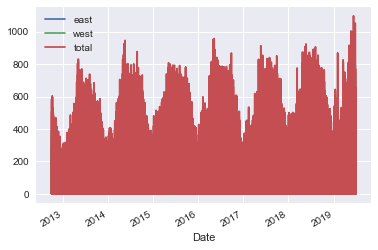

In [60]:
data.plot()

In [39]:
data.resample('W').get_group('2012-10-07''2012-11-07')

AttributeError: 'str' object has no attribute '_take'

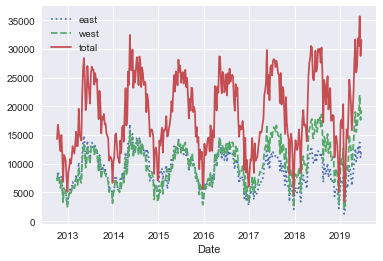

In [11]:
weekly = data.resample('W').sum()
# print(data.sum())
weekly.plot(style=[':','--','-'])


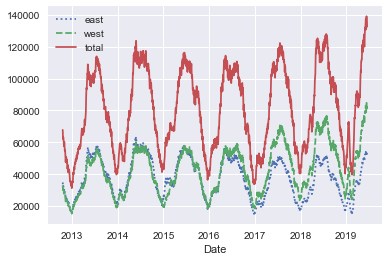

In [16]:
daily = data.resample('D').sum()
daily.rolling(30, center= True).sum().plot(style =[':','--','-'])

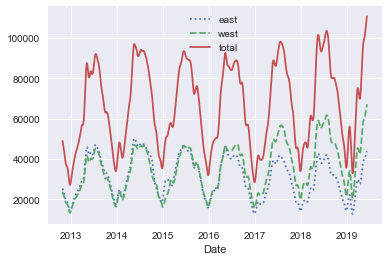

In [45]:
daily.rolling(50, center = True, win_type = 'gaussian').sum (std = 10).plot(style = [':','--','-'])

In [63]:
daily.rolling(500, center= True).__bytes__

<bound method StringMixin.__bytes__ of Rolling [window=500,center=True,axis=0]>

In [50]:
daily.rolling(30, center= True, win_type = 'gaussian').plot(style = [':','--','-'])

AttributeError: 'Window' object has no attribute 'plot'

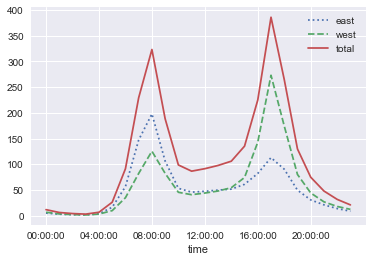

In [7]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60* np.arange(6)
by_time.plot(xticks = hourly_ticks,style=[':','--','-'])

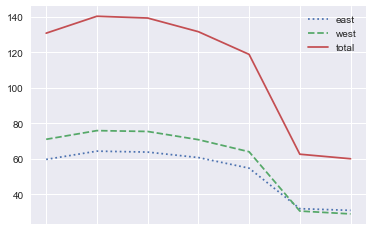

In [85]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['mon','tus','wen','thu','fri','sat','sun']
by_weekday.plot(style = [':','--','-'])

In [52]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()*100

In [53]:
print(by_time.loc['Weekday'])

                  east          west         total
00:00:00    426.734926    553.071672    979.806598
01:00:00    222.241183    260.295791    482.536974
02:00:00    162.343572    162.400455    324.744027
03:00:00    144.596132    131.058020    275.654152
04:00:00    429.010239    339.249147    768.259386
05:00:00   2129.237770   1235.153584   3364.391354
06:00:00   7561.945392   4530.716724  12092.662116
07:00:00  19934.300341  10889.249147  30823.549488
08:00:00  26436.518771  16422.525597  42859.044369
09:00:00  13145.987479   9991.291975  23137.279454
10:00:00   5317.074559   4549.686966   9866.761525
11:00:00   3921.172453   3481.787137   7402.959590
12:00:00   3917.871372   3701.252134   7619.123506
13:00:00   4132.878271   4098.009101   8230.887372
14:00:00   4366.723549   4964.675768   9331.399317
15:00:00   5724.857793   7762.002275  13486.860068
16:00:00   8926.905575  17576.507395  26503.412969
17:00:00  13665.244596  36182.195677  49847.440273
18:00:00  10976.678043  22840.2

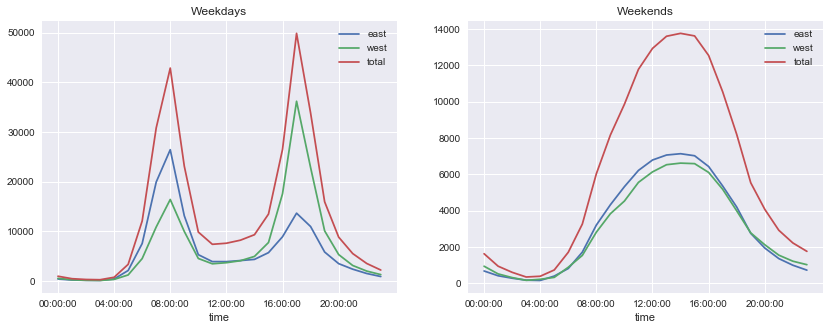

In [61]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0],xticks= hourly_ticks,title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1],xticks= hourly_ticks,title='Weekends')

## query() and evel()

In [12]:
rng = np.random.RandomState(42)
df1,df2,df3,df4,df5 = (pd.DataFrame(rng.randint(0,1000,(100,3))) for i in range(5))
x = rng.rand(int(1E6))
y = rng.rand(int(1E6))


In [8]:
%timeit x+y

6.3 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit np.fromiter((i+j for i,j in zip(x,y)),dtype=x.dtype,count = len(x))

397 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit mask = (x>0.5) & (y<0.5)

3.45 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit mask_numexpr= numexpr.evaluate('(x >0.5) & (y<0.5)')
np.allclose(mask,mask_numexpr)

7.16 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


True

In [23]:
nrows,ncols = 10000,100
df1,df2,df3,df4 = (pd.DataFrame(rng.rand(nrows,ncols)) for i in range(4))

In [26]:
%timeit df1+df2+df3+df4

21.4 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit pd.eval('df1+df2+df3+df4')

15.3 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
df1,df2,df3,df4,df5 = (pd.DataFrame(rng.randint(0,1000,(100,3))) for i in range(5))

In [32]:
res1 = -df1 * df1 / (df3 + df4) - df5
res2 = pd.eval('-df1 * df1 / (df3 + df4) - df5')
np.allclose(res1 , res2)

(100, 3)


True

In [36]:
res1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
res2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
res3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
print(np.allclose(res1, res2))
np.allclose(res1,res3)

True


True

In [8]:
result1 = df2.T[0] + df3.iloc[1]
pp (df2.T[0], '+', df3.iloc[1],'=',result1)
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
pp(result2)
np.allclose(result1,result2)

0    709              + 0     57              = 0     766   
1    415                1    950                1    1365   
2    246                2    345                2     591   
Name: 0, dtype: int32   Name: 1, dtype: int32   dtype: int32
0     766   
1    1365   
2     591   
dtype: int32


True

In [31]:
df = pd.DataFrame(rng.rand(1000,3),columns = ['A','B','C'])
df.head()

A         B         C
0  0.134440  0.092808  0.863990
1  0.158675  0.654045  0.522063
2  0.101268  0.993403  0.874558
3  0.290981  0.819962  0.243420
4  0.230089  0.398527  0.414873

In [24]:
res1 = (df['A'] + df['B'])/(df['C']-1)
res2 = pd.eval("(df.A + df.B)/(df.C-1)")
res3 = df.eval('( A + B )/( C - 1)')
print(np.allclose(res1,res2))
np.allclose(res1,res3)

True


True

In [25]:
df.head()

A         B         C
0  0.540389  0.462402  0.861754
1  0.495515  0.841984  0.705468
2  0.263129  0.682246  0.063732
3  0.641015  0.809734  0.037968
4  0.842305  0.011802  0.865529

In [34]:
df.eval('D = (A+B)/C',inplace = True)
df.head()

A         B         C         D
0  0.134440  0.092808  0.863990  0.263022
1  0.158675  0.654045  0.522063  1.556747
2  0.101268  0.993403  0.874558  1.251686
3  0.290981  0.819962  0.243420  4.563898
4  0.230089  0.398527  0.414873  1.515199

In [35]:
df.eval('D=(A-B)/C',inplace= True)
df.head()

A         B         C         D
0  0.134440  0.092808  0.863990  0.048185
1  0.158675  0.654045  0.522063 -0.948872
2  0.101268  0.993403  0.874558 -1.020098
3  0.290981  0.819962  0.243420 -2.173121
4  0.230089  0.398527  0.414873 -0.406000

In [39]:
result1 = df[ (df.A < 0.5) & (df.B < 0.5) ]
result2 = pd.eval('df[ (df.A < 0.5) & (df.B < 0.5) ]')
result3 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1,result3)

True

In [40]:
Cmean = df['C'].mean()
res1 = df[(df.A < Cmean) & (df.B < Cmean)]
res2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(res1,res2)

True

# Visualization with MatPlotLib





#  

In [3]:
plt.style.use('classic')
x=np.linspace(0,10,100)
y = np.sin(x)
%matplotlib inline

In [4]:
plt.style.use('seaborn-whitegrid')
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

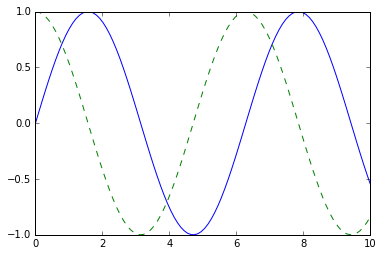

In [11]:
fig = plt.figure()
plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--')

In [12]:
fig.savefig('my_figure.png')

In [16]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 56CE-0B1F

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\‘ҐаЈҐ©\jupyter-repo\Python Data Science Cookbook

06.08.2019  16:21    <DIR>          .
06.08.2019  16:21    <DIR>          ..
05.08.2019  16:04    <DIR>          .ipynb_checkpoints
06.08.2019  16:21           368я451 Main.ipynb
06.08.2019  16:20            26я306 my_figure.png
04.08.2019  13:47    <DIR>          statick
               2 д ©«®ў        394я757 Ў ©в
               4 Ї Ї®Є  105я789я194я240 Ў ©в бў®Ў®¤­®


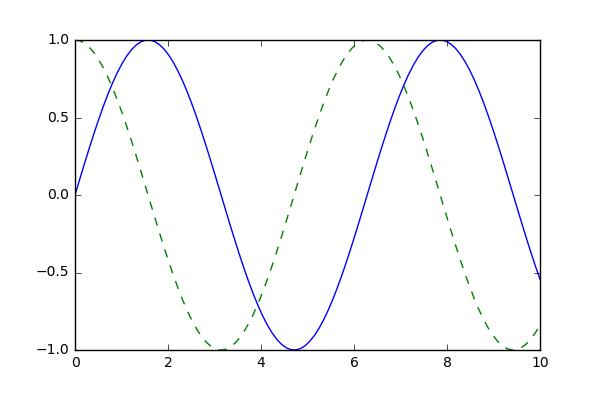

In [18]:
from IPython.display import Image
Image('my_figure.png')

In [19]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

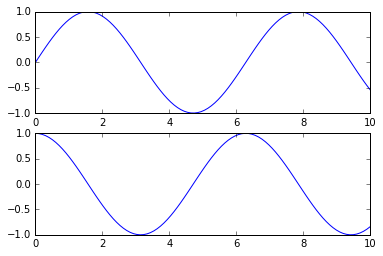

In [20]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x,np.sin(x))

plt.subplot(2,1,2)
plt.plot(x,np.cos(x))

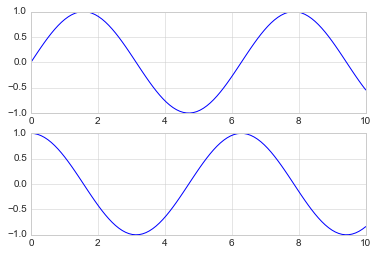

In [23]:
fig,ax = plt.subplots(2)

ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

In [22]:
plt.style.use('seaborn-whitegrid')

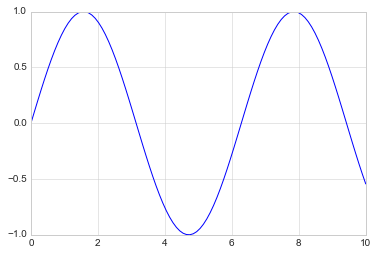

In [33]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x,np.sin(x))

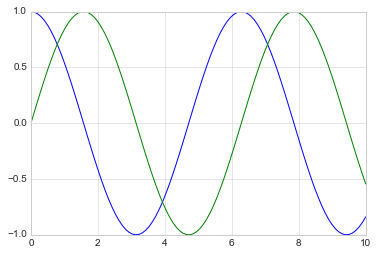

In [35]:
plt.plot(x,np.cos(x))
plt.plot(x,np.sin(x))

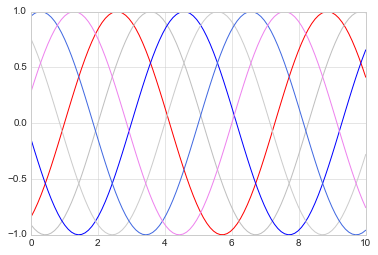

In [41]:
plt.plot(x,np.sin(x - 1),color = 'red')
plt.plot(x,np.sin(x - 2),color = '0.75')
plt.plot(x,np.sin(x - 3),color = '#0000ff')
plt.plot(x,np.sin(x - 4),color = (0.8,0.8,0.8))
plt.plot(x,np.sin(x - 5),color = 'royalblue')
plt.plot(x,np.sin(x - 6),color = 'violet')

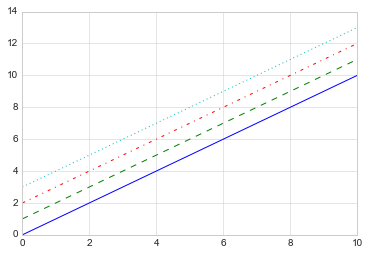

In [45]:
plt.plot(x,x + 0,linestyle = 'solid')
plt.plot(x,x + 1,linestyle = 'dashed')
plt.plot(x,x + 2,linestyle = 'dashdot')
plt.plot(x,x + 3,linestyle = 'dotted')

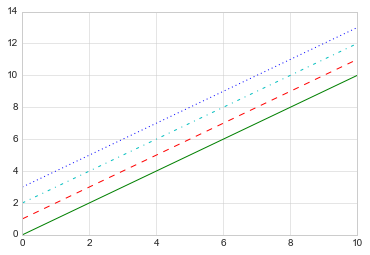

In [5]:
plt.plot(x,x,'-g')
plt.plot(x,x+1,'--r')
plt.plot(x,x+2,'-.c')
plt.plot(x,x+3,':b')

(1.5, -1.5)

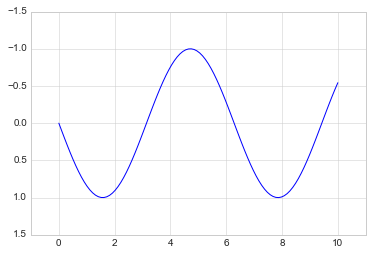

In [7]:
plt.plot(x,np.sin(x))
plt.xlim(-1,11)
plt.ylim(1.5,-1.5)

[-1, 11, -1.5, 1.5]

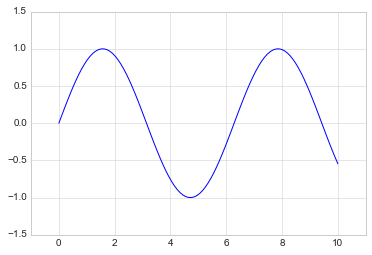

In [9]:
plt.plot(x,np.sin(x))
plt.axis([-1,11,-1.5,1.5])

(0.0, 10.0, -0.9993845576124357, 0.9996923408861117)

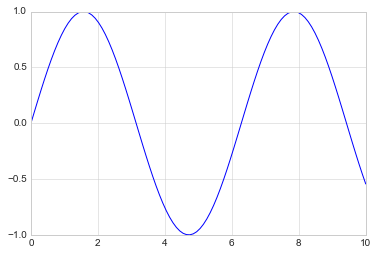

In [12]:
plt.plot(x,np.sin(x))
plt.axis('tight')

(0.0, 10.0, -1.0, 1.0)

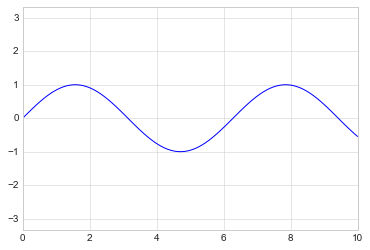

In [14]:
plt.plot(x,np.sin(x))
plt.axis('equal')

Text(0,0.5,'sin x')

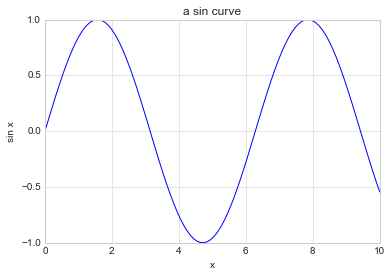

In [17]:
plt.plot(x,np.sin(x))
plt.title('a sin curve')
plt.xlabel('x')
plt.ylabel('sin x')

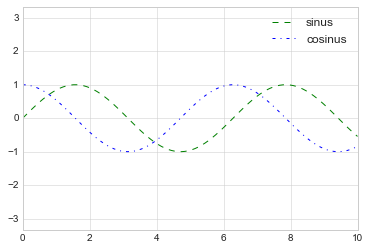

In [22]:
plt.plot(x,np.sin(x),'--g',label = 'sinus')
plt.plot(x,np.cos(x),'-.b',label = 'cosinus')
plt.axis('equal')
plt.legend()

[(-1.5, 1.5),
 Text(0,0.5,'sin of x'),
 (-1, 11),
 Text(0.5,0,'x'),
 Text(0.5,1,'A Sinusoid')]

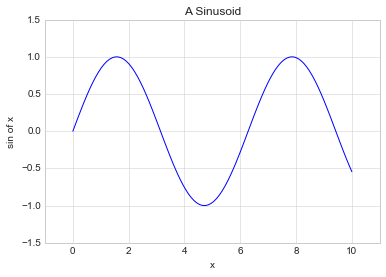

In [24]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim = (-1,11),ylim = (-1.5,1.5),
      title = 'A Sinusoid',
       xlabel = 'x', ylabel = 'sin of x'
      )

##     - simple scatter plots

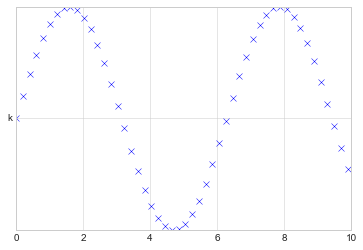

In [48]:
plt.plot(x[::2],y[::2],'x','k')

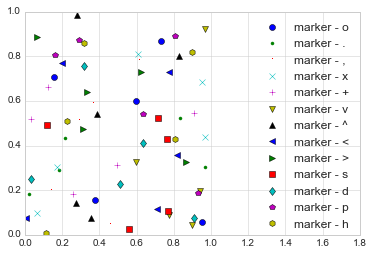

In [59]:
rng = np.random.RandomState(42)
for mark in ['o','.',',','x','+','v','^','<','>','s','d','p','h']:
    plt.plot(rng.rand(5),rng.rand(5),mark,label = 'marker - {0}'.format(mark))
    plt.legend(numpoints = 1)
    plt.xlim(0,1.8)

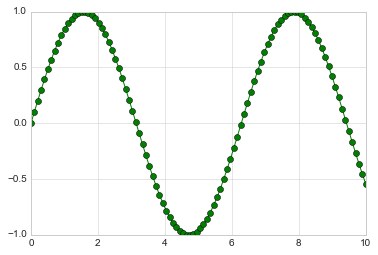

In [49]:
plt.plot(x,y,'-og')

(-1.2, 1.2)

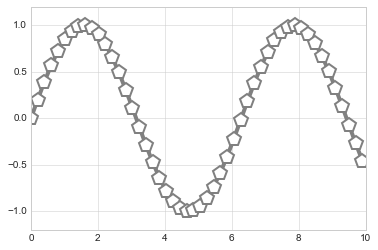

In [57]:
plt.plot(x[::2],y[::2],'-p',color = 'gray',
        markersize = 15,linewidth = 4,
         markerfacecolor = 'white',
         markeredgecolor = 'gray',
         markeredgewidth = 2)
plt.ylim(-1.2,1.2)

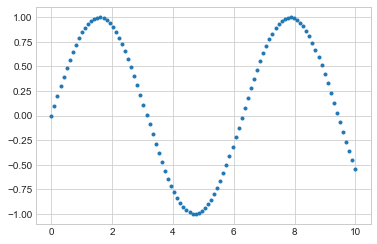

In [13]:
plt.scatter(x,y,marker = '.')

[0.69742877 0.45354268 0.7220556  0.86638233 0.97552151 0.85580334
 0.01171408 0.35997806 0.72999056 0.17162968 0.52103661 0.05433799
 0.19999652 0.01852179 0.7936977  0.22392469 0.34535168 0.92808129
 0.7044144  0.03183893 0.16469416 0.6214784  0.57722859 0.23789282
 0.934214   0.61396596 0.5356328  0.58990998 0.73012203 0.311945
 0.39822106 0.20984375 0.18619301 0.94437239 0.7395508  0.49045881
 0.22741463 0.25435648 0.05802916 0.43441663 0.31179588 0.69634349
 0.37775184 0.17960368 0.02467873 0.06724963 0.67939277 0.45369684
 0.53657921 0.89667129 0.99033895 0.21689698 0.6630782  0.26332238
 0.020651   0.75837865 0.32001715 0.38346389 0.58831711 0.83104846
 0.62898184 0.87265066 0.27354203 0.79804683 0.18563594 0.95279166
 0.68748828 0.21550768 0.94737059 0.73085581 0.25394164 0.21331198
 0.51820071 0.02566272 0.20747008 0.42468547 0.37416998 0.46357542
 0.27762871 0.58678435]


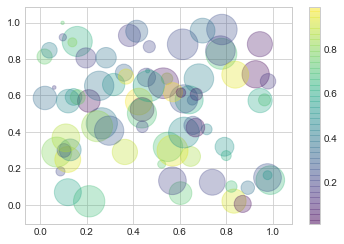

In [22]:
rng = np.random.RandomState(0)
x = rng.rand(80)
y = rng.rand(80)
colors = rng.rand(80)
print(colors)
size = 1000 * rng.rand(100)

plt.scatter(x,y,c = colors,s = size,alpha = 0.3, cmap = 'viridis' )
plt.colorbar()

Text(0,0.5,'sepal width (cm)')

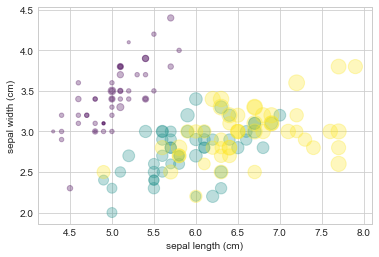

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0],features[1],alpha = 0.3,
           s = 100*features[3],c = iris.target ,cmap = 'viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


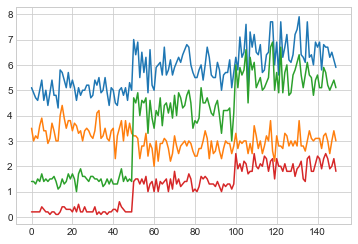

In [47]:
print(iris.feature_names)
ir = pd.DataFrame(iris.data)
ir.columns = iris.feature_names
plt.plot(ir)

## basic Errorbars

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


<ErrorbarContainer object of 3 artists>

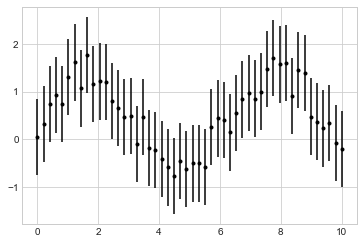

In [65]:
x = np.linspace(0,10,50)
print(x)
dy = 0.8
y = np.sin(x) + dy * np.random.rand(50)

plt.errorbar(x,y,yerr=dy,fmt = '.k')

<ErrorbarContainer object of 3 artists>

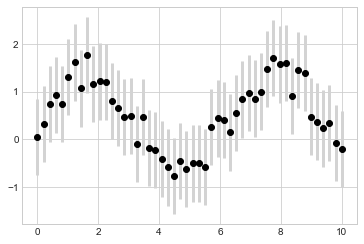

In [77]:
plt.errorbar(x,y,yerr=dy,fmt='o',color = 'black',ecolor = 'lightgray',elinewidth = 3, capsize = 0)

In [7]:
from sklearn.gaussian_process import GaussianProcess

In [10]:
model = lambda x: x* np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

gp = GaussianProcess (corr = 'cubic',theta0 = 1e-2, thetaL = 1e-4, thetaU = 1E-1, random_start = 100)
gp.fit(xdata[:,np.newaxis],ydata)

xfit = np.linspace(0,10,1000)
yfit, MSE = gp.predict(xfit[:,np.newaxis],eval_MSE = True)
dyfit = 2 * np.sqrt(MSE)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be rem

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be rem

(0, 10)

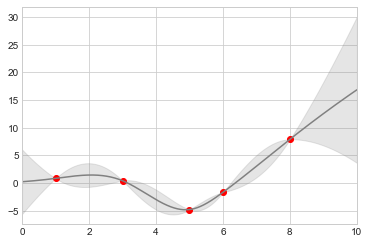

In [27]:
plt.plot(xdata,ydata,'or')
plt.plot(xfit, yfit, '-',color = 'gray')
# plt.plot(xfit,yfit - dyfit)
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color = 'gray', alpha = 0.2)
plt.xlim(0,10)

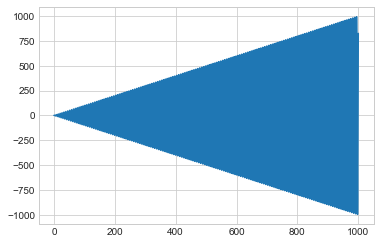

## visualizing a three-dimensional functions

In [8]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10+ y*x) * np.cos(x)

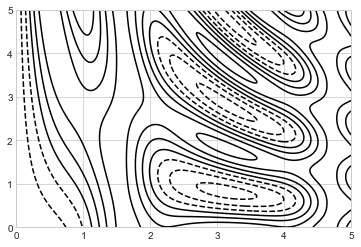

In [70]:
x = np.linspace(0,5,500)
y = np.linspace(0,5,400)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contour(X,Y,Z, colors = 'black')

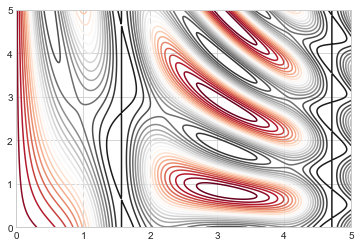

In [71]:
plt.contour(X,Y,Z,20, cmap = 'RdGy')

In [72]:
pp(X,Y,Z)

[[0.         0.01002004 0.02004008 ... 4.97995992 4.98997996 5.        ]  [[0.         0.         0.         ... 0.         0.         0.        ]  [[-0.83907153 -0.83902941 -0.83890305 ...  0.47421374  0.44689056
 [0.         0.01002004 0.02004008 ... 4.97995992 4.98997996 5.        ]   [0.01253133 0.01253133 0.01253133 ... 0.01253133 0.01253133 0.01253133]     0.41940746]                                                   
 [0.         0.01002004 0.02004008 ... 4.97995992 4.98997996 5.        ]   [0.02506266 0.02506266 0.02506266 ... 0.02506266 0.02506266 0.02506266]   [-0.83907153 -0.83896109 -0.83876643 ...  0.48361576  0.45665623
 ...                                                                       ...                                                                         0.42953725]                                                   
 [0.         0.01002004 0.02004008 ... 4.97995992 4.98997996 5.        ]   [4.97493734 4.97493734 4.97493734 ... 4.97493734 4.97493734 4.9749373

In [73]:
dir(plt.cm.

SyntaxError: unexpected EOF while parsing (<ipython-input-73-5e4b571624eb>, line 1)

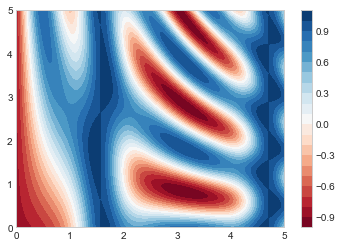

In [77]:
plt.contourf(X,Y,Z,20, cmap = 'RdBu')
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

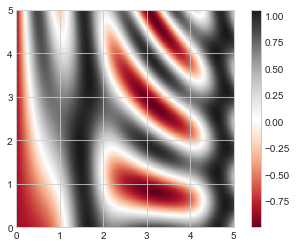

In [81]:
plt.imshow(Z,extent = [0,5,0,5],origin = 'lower',cmap = 'RdGy')
plt.colorbar()
plt.axis(aspect = 0)

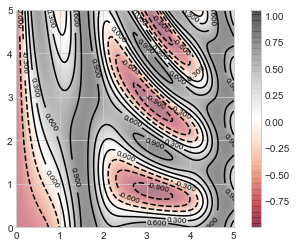

In [102]:
color_s = plt.contour (X,Y,Z,7, colors = 'black')
plt.clabel(color_s ,inline = True,fontsize = 8)
plt.imshow (Z,extent = [0,5,0,5],origin = 'lower',alpha = 0.5,cmap= 'RdGy')
plt.colorbar()

## histograms, binnings, density

In [51]:
data = np.random.randn(1000)
print (data)

[-1.43424129e+00 -1.54541557e+00 -3.53756407e-01 -1.54117020e+00
 -1.39163481e+00 -2.97125505e+00 -1.84615305e+00 -2.33092570e-01
 -1.36328865e+00 -2.02765497e+00  7.39172626e-01 -3.44352716e-01
  1.52747855e+00 -4.51435794e-01  1.61760658e-01 -5.46289723e-01
  1.00794193e+00 -2.81125699e+00  1.59484110e-01 -1.89926537e+00
  2.48287031e+00 -4.48322891e-01  6.14824525e-02  1.20769164e+00
  5.72400943e-01 -6.93071842e-01 -7.79270402e-01  4.62027635e-01
 -4.06092814e-01  7.62812975e-01 -1.25284304e+00  1.24020747e+00
 -1.43243815e+00 -3.71666543e-01 -8.04556756e-01 -7.17323432e-01
 -2.24843459e-02  2.08090403e+00  5.84478251e-01 -1.54785245e-01
 -1.07925365e+00  1.00615354e+00  6.46282770e-01 -1.93947650e+00
  2.70979795e-02 -1.01425284e+00 -1.09477030e+00  1.24870232e+00
  5.12864911e-01  3.40585537e-01 -3.45413018e-01  2.68373014e-02
 -4.97077435e-01  3.19462901e-01 -9.86522681e-01 -3.14061816e-01
 -1.92679684e+00  1.68382920e-01  4.29885195e-01 -1.22239529e+00
  8.94190532e-02  6.36339

(array([  3.,  18.,  64., 160., 241., 261., 165.,  61.,  22.,   5.]),
 array([-3.4900124 , -2.80563948, -2.12126657, -1.43689366, -0.75252074,
        -0.06814783,  0.61622508,  1.300598  ,  1.98497091,  2.66934382,
         3.35371674]),
 <a list of 10 Patch objects>)

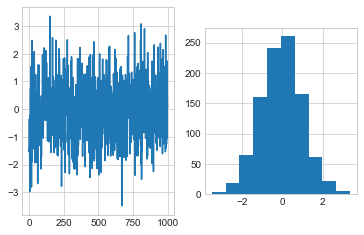

In [53]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.set_aspect(200)
ax1.plot(data)
ax2.set_aspect(0.03)
ax2.hist(data)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


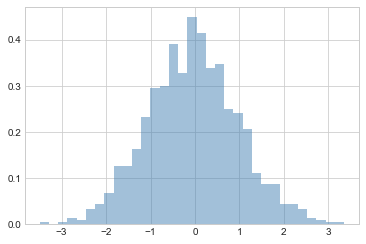

In [61]:
plt.hist(data,bins = 33, normed = True, alpha = 0.5,
        histtype = 'stepfilled', color = 'steelblue',
        edgecolor = 'none');

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00317883, 0.        , 0.        , 0.00317883, 0.        ,
        0.00317883, 0.01271531, 0.01589414, 0.0222518 , 0.03178829,
        0.03814594, 0.02543063, 0.05404009, 0.0667554 , 0.09218603,
        0.12079549, 0.10490134, 0.16847792, 0.19072972, 0.16529909,
        0.21616034, 0.16529909, 0.19390854, 0.19072972, 0.15258377,
        0.18437206, 0.19390854, 0.11443783, 0.16212026, 0.0890072 ,
        0.11761666, 0.07311306, 0.06357657, 0.03496711, 0.03178829,
        0.01907297, 0.03178829, 0.00953649, 0.00635766, 0.00953649]),
 array([-4.02042287, -3.70584158, -3.39126029, -3.076679  , -2.76209771,
        -2.44751642, -2.13293513, -1.81835385, -1.50377256, -1.18919127,
        -0.87460998, -0.56002869, -0.2454474 ,  0.06913389,  0.38371518,
         0.69829647,  1.01287776,  1.32745905,  1.64204034,  1.95662163,
         2.27120292,  2.58578421,  2.9003655 ,  3.21494679,  3.52952808,
         3.84410937,  4.15869066,  4.47327195,  4.78785324,  5.10243453,
         5.41701

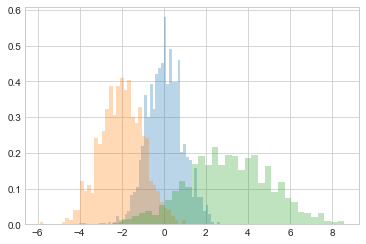

In [65]:
x = np.random.normal(0,0.8,1000)
y = np.random.normal(-2,1,1000)
z = np.random.normal(3,2,1000)
kwargs = dict(histtype = 'stepfilled',alpha = 0.3,normed = True,bins = 40)
plt.hist(x,**kwargs)
plt.hist(y,**kwargs)
plt.hist(z,**kwargs)

In [66]:
counts, bin_edges = np.histogram (data,bins = 5)
print(counts)
print(bin_edges)

[ 21 224 502 226  27]
[-3.4900124  -2.12126657 -0.75252074  0.61622508  1.98497091  3.35371674]


[ 0.77654412 -1.71979833  1.57051943 ... -0.63054715  1.35317846
  0.42590102] [-0.16434671 -2.01451202  0.80639947 ... -0.61553916  2.77261696
  1.59194841]


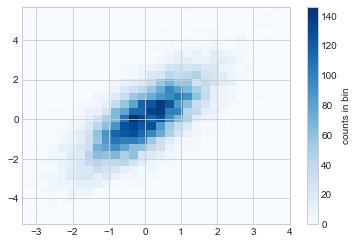

In [5]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal (mean,cov,10000).T
print(x,y)
plt.hist2d(x,y,bins = 30,cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

(array([  2.,   3.,   2.,  16.,  28.,  42.,  99., 141., 194., 295., 415.,
        551., 646., 794., 887., 918., 905., 903., 801., 657., 527., 394.,
        280., 204., 111.,  70.,  54.,  25.,  16.,   6.,   8.,   2.,   4.]),
 array([-5.30413989, -4.97167599, -4.63921209, -4.3067482 , -3.9742843 ,
        -3.6418204 , -3.3093565 , -2.97689261, -2.64442871, -2.31196481,
        -1.97950091, -1.64703701, -1.31457312, -0.98210922, -0.64964532,
        -0.31718142,  0.01528248,  0.34774637,  0.68021027,  1.01267417,
         1.34513807,  1.67760197,  2.01006586,  2.34252976,  2.67499366,
         3.00745756,  3.33992145,  3.67238535,  4.00484925,  4.33731315,
         4.66977705,  5.00224094,  5.33470484,  5.66716874]),
 <a list of 33 Patch objects>)

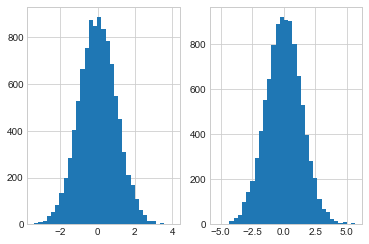

In [11]:
fig, ax = plt.subplots(1,2)
ax[0].hist(x, bins = 33)
ax[1].hist(y,bins = 33)

In [12]:
counts, xedges,yedges = np.histogram2d(x,y,bins = 33)

In [13]:
print(counts, xedges, yedges)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] [-3.3942466  -3.16980452 -2.94536244 -2.72092037 -2.49647829 -2.27203621
 -2.04759414 -1.82315206 -1.59870998 -1.37426791 -1.14982583 -0.92538375
 -0.70094168 -0.4764996  -0.25205752 -0.02761545  0.19682663  0.42126871
  0.64571078  0.87015286  1.09459494  1.31903701  1.54347909  1.76792117
  1.99236324  2.21680532  2.4412474   2.66568947  2.89013155  3.11457363
  3.3390157   3.56345778  3.78789985  4.01234193] [-5.30413989 -4.97167599 -4.63921209 -4.3067482  -3.9742843  -3.6418204
 -3.3093565  -2.97689261 -2.64442871 -2.31196481 -1.97950091 -1.64703701
 -1.31457312 -0.98210922 -0.64964532 -0.31718142  0.01528248  0.34774637
  0.68021027  1.01267417  1.34513807  1.67760197  2.01006586  2.34252976
  2.67499366  3.00745756  3.33992145  3.67238535  4.00484925  4.33731315
  4.66977705  5.00224094  5.33470484  5.66716874]


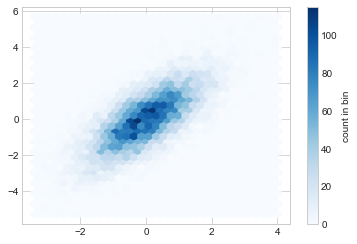

In [23]:
plt.hexbin(x,y,gridsize = 33,cmap = 'Blues')
cd = plt.colorbar(label = 'count in bin')

In [24]:
from scipy.stats import gaussian_kde

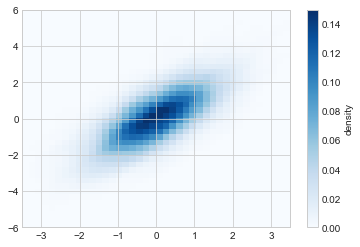

In [72]:
data = np.vstack([x,y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5,3.5,40)
ygrid = np.linspace (-6,6,40)
Xgrid, Ygrid = np.meshgrid(xgrid,ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
          origin = 'lower',
          aspect = 'auto',
          cmap = 'Blues',
          extent = [-3.5,3.5,-6,6])
cb = plt.colorbar()
cb.set_label('density')

In [57]:
print(kde)


In [70]:

print(Z.shape)

(1600,)


## customizing plot legends

In [13]:
plt.style.use('classic')

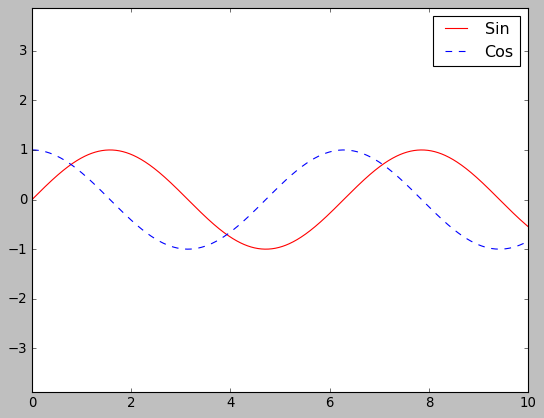

In [16]:
x = np.linspace(0,10,1000)

fig,ax = plt.subplots()
ax.plot(x,np.sin(x),'-r', label = 'Sin')
ax.plot(x,np.cos(x),'--b',label = 'Cos')
ax.axis('equal')
leg = ax.legend()

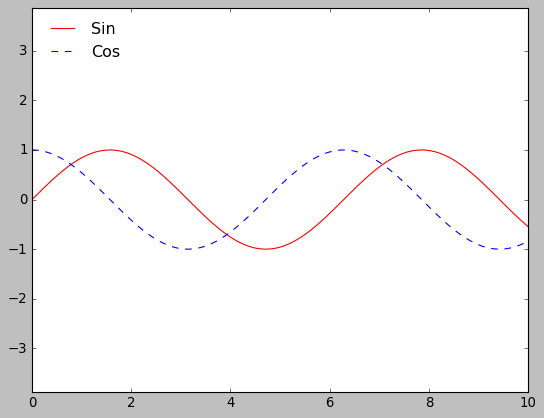

In [21]:
ax.legend(loc ='upper left',frameon = False)
fig

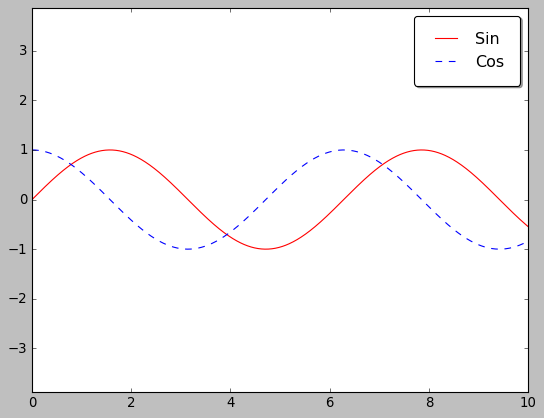

In [33]:
ax.legend(fancybox = True,framealpha =1, shadow = True, borderpad = 1)
fig

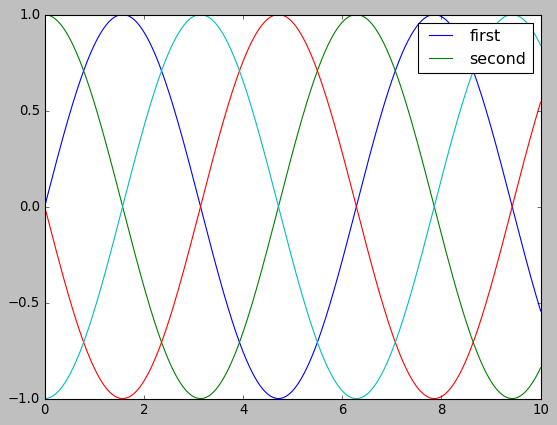

In [38]:
y = np.sin(x[:,np.newaxis]+ np.pi * np.arange(0,2,0.5))
lenes = plt.plot(x,y)
plt.legend(lenes[:2],['first','second'])

In [46]:
print(x[:,np.newaxis])

[[ 0.        ]
 [ 0.01001001]
 [ 0.02002002]
 [ 0.03003003]
 [ 0.04004004]
 [ 0.05005005]
 [ 0.06006006]
 [ 0.07007007]
 [ 0.08008008]
 [ 0.09009009]
 [ 0.1001001 ]
 [ 0.11011011]
 [ 0.12012012]
 [ 0.13013013]
 [ 0.14014014]
 [ 0.15015015]
 [ 0.16016016]
 [ 0.17017017]
 [ 0.18018018]
 [ 0.19019019]
 [ 0.2002002 ]
 [ 0.21021021]
 [ 0.22022022]
 [ 0.23023023]
 [ 0.24024024]
 [ 0.25025025]
 [ 0.26026026]
 [ 0.27027027]
 [ 0.28028028]
 [ 0.29029029]
 [ 0.3003003 ]
 [ 0.31031031]
 [ 0.32032032]
 [ 0.33033033]
 [ 0.34034034]
 [ 0.35035035]
 [ 0.36036036]
 [ 0.37037037]
 [ 0.38038038]
 [ 0.39039039]
 [ 0.4004004 ]
 [ 0.41041041]
 [ 0.42042042]
 [ 0.43043043]
 [ 0.44044044]
 [ 0.45045045]
 [ 0.46046046]
 [ 0.47047047]
 [ 0.48048048]
 [ 0.49049049]
 [ 0.5005005 ]
 [ 0.51051051]
 [ 0.52052052]
 [ 0.53053053]
 [ 0.54054054]
 [ 0.55055055]
 [ 0.56056056]
 [ 0.57057057]
 [ 0.58058058]
 [ 0.59059059]
 [ 0.6006006 ]
 [ 0.61061061]
 [ 0.62062062]
 [ 0.63063063]
 [ 0.64064064]
 [ 0.65065065]
 [ 0.66066

In [10]:
cities = pd.read_csv('statick/california_cities.csv')
lat, lon = cities['latd'],cities['longd']
pop,area = cities['population_total'],cities['area_total_km2']


Text(0.5,1,'California cities area and polulation')

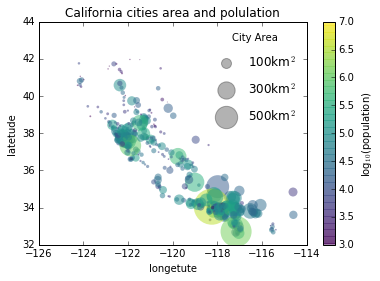

In [11]:
plt.scatter(lon,lat,label = None,
           c = np.log10(pop),
           cmap = 'viridis',
           s = area, linewidth = 0,alpha = 0.5)
plt.xlabel('longetute')
plt.ylabel('latetude')
plt.colorbar(label = 'log$_{10}$(population)')
plt.clim(3,7)

for area in [100,300,500]:
    plt.scatter([],[], c ='k' ,alpha = 0.3, s = area, label = str(area) + 'km$^2$')
plt.legend(scatterpoints = 1, frameon = False, labelspacing = 1, title = 'City Area')
plt.title('California cities area and polulation')

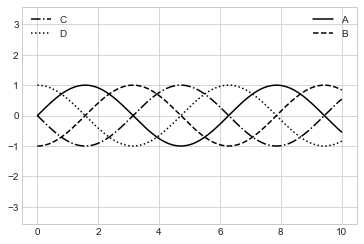

In [16]:
fig,ax = plt.subplots()
lines = []
style = ['-','--','-.',':']
x = np.linspace(0,10,1000)
for i in range (4):
    lines += ax.plot(x,np.sin(x - i * np.pi/2), style[i],color = 'black')
ax.legend(lines[:2],['A','B'],loc = 'upper right',frameon = False)
ax.axis('equal')

from matplotlib.legend import Legend

leg = Legend(ax,lines[2:],['C','D'],loc = 'upper left',frameon = False)
ax.add_artist(leg);

In [18]:
ax.legend??


## custumizing colorbars

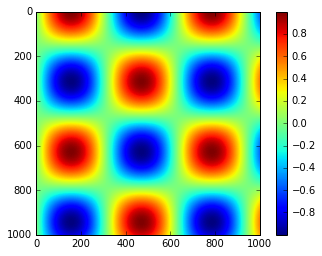

In [27]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar()

In [5]:
x = np.linspace(0,1,10)
I= np.sin(x) * np.cos(x[:,None])

    

In [6]:
print(x)
pp(x.T,np.vstack(x))
pp(np.allclose(x[:,None],x[:,None]))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556 [[0.        ] 
 0.66666667 0.77777778 0.88888889 1.        ]                       [0.11111111] 
                                                                    [0.22222222] 
                                                                    [0.33333333] 
                                                                    [0.44444444] 
                                                                    [0.55555556] 
                                                                    [0.66666667] 
                                                                    [0.77777778] 
                                                                    [0.88888889] 
                                                                    [1.        ]]
True


In [7]:
print(I.shape)

(10, 10)


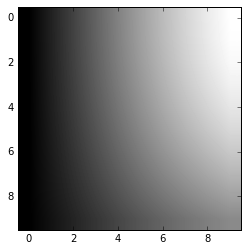

In [8]:
plt.imshow(I,cmap = "gray")

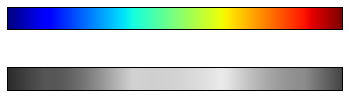

In [9]:
from  matplotlib.colors import LinearSegmentedColormap 

def grayscale_cmap(cmap):
    """return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299,0.587,0.114]
    luminance = np.sqrt(np.dot(colors[:,:3] ** 2 , RGB_weight))
    colors[:,:3] = luminance [ :,np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray',colors,cmap.N)

def view_colormap(cmap):
    """plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2,figsize = (6,2), subplot_kw = dict (xticks = [],yticks = []))
    ax[0].imshow([colors],extent = [0,15,0,1])
    ax[1].imshow([grayscale], extent = [0,15,0,1])
view_colormap('jet')

In [10]:
print(plt.cm.get_cmap('jet'))

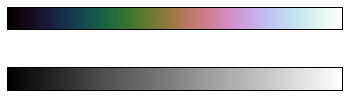

In [11]:
view_colormap('cubehelix')

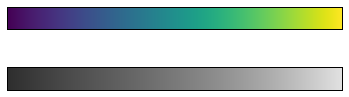

In [12]:
view_colormap('viridis')

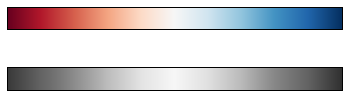

In [13]:
view_colormap('RdBu')

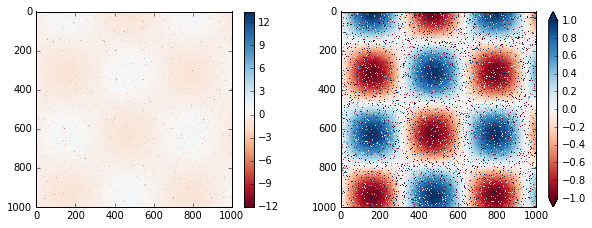

In [47]:
speaks = (np.random.random(I.shape) <0.01)
I[speaks] = np.random.normal(0,3,np.count_nonzero(speaks))

plt.figure(figsize = (10,3.5))

plt.subplot(1,2,1)
plt.imshow(I,cmap = "RdBu")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I,cmap= 'RdBu')
plt.colorbar(extend = 'both')
plt.clim(-1,1)

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
           0.,   0.,   3.,   2.,   2.,   0.,   0.,   3.,   1.,   2.,   2.,
           1.,   3.,   1., 939.,   3.,   4.,   2.,   3.,   3.,   2.,   2.,
           2.,   0.,   3.,   1.,   3.,   0.,   1.,   2.,   2.,   0.,   0.,
           0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.]),
  array([  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
           1.,   1.,   1.,   0.,   1.,   1.,   3.,   2.,   3.,   1.,   2.,
        

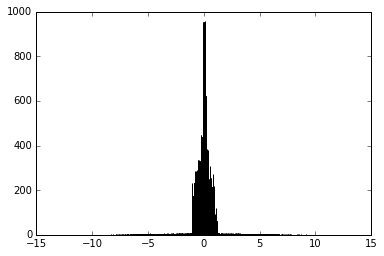

In [48]:

plt.hist(I,bins = 100)

In [41]:
print(0 - I.mean())

0.010355817859346262


(array([ 9.,  8.,  6.,  8., 14., 13.,  9., 12., 13.,  8.]),
 array([0.00150389, 0.10076584, 0.20002778, 0.29928972, 0.39855166,
        0.49781361, 0.59707555, 0.69633749, 0.79559943, 0.89486137,
        0.99412332]),
 <a list of 10 Patch objects>)

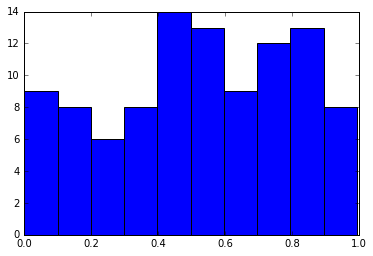

In [51]:
plt.hist(np.random.random(100))

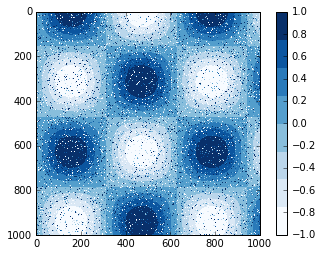

In [57]:
plt.imshow(I, cmap = plt.cm.get_cmap('Blues',8))
plt.colorbar()
plt.clim(-1,1)

In [10]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)



In [11]:
print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [12]:
print(np.array_equal(digits.images[0].reshape(64),digits.data[0]))

True


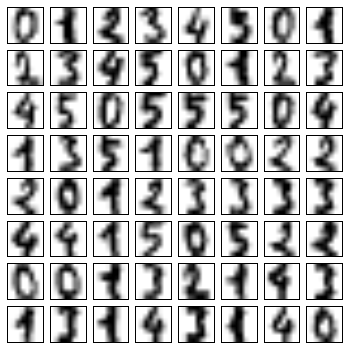

In [13]:
fig,ax = plt.subplots(8,8,figsize = (6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap = 'binary')
    axi.set(xticks =[],yticks = [])

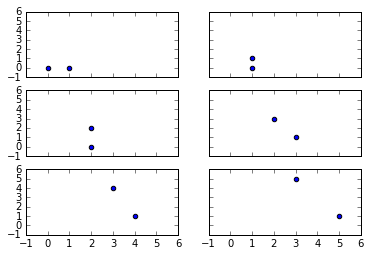

In [14]:
fig, axes = plt.subplots(ncols=2,nrows=3, sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.scatter([i//2+1, i],[i,i//3])

plt.show()

In [15]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

In [16]:
print(projection.shape)

(1083, 2)


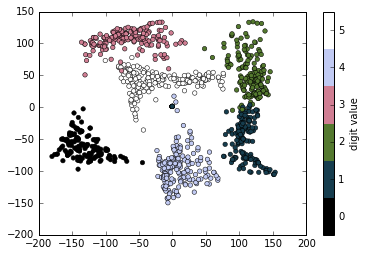

In [18]:
plt.scatter(projection[:,0],projection[:,1],c = digits.target, cmap=plt.cm.get_cmap('cubehelix',6),linewidths = 0.5)
plt.colorbar(ticks = range(6),label = 'digit value')
plt.clim(-0.5, 5.5)

## multiple subplots

In [4]:
plt.style.use('seaborn-white')


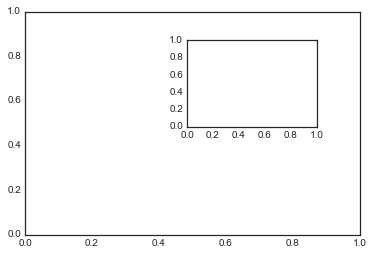

In [5]:
ax1 = plt.axes()
ax2 = plt.axes([0.50,0.50,0.3,0.3])

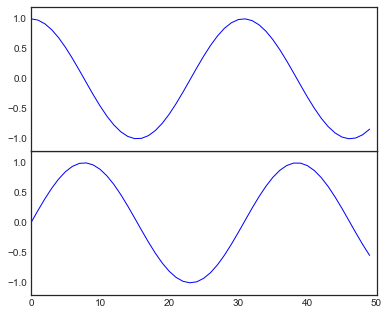

In [6]:
fig = plt.figure()

ax1 = fig.add_axes([0,0,0.8,0.5],ylim = [-1.2,1.2])
ax2 = fig.add_axes([0,0.5,0.8,0.5],xticklabels = [],ylim = [-1.2,1.2])

x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

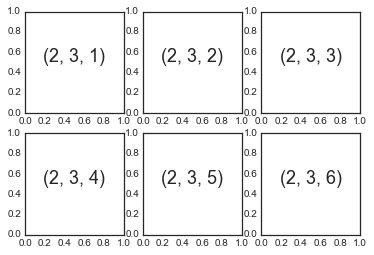

In [7]:
for i in range (1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize = 18,ha = 'center')

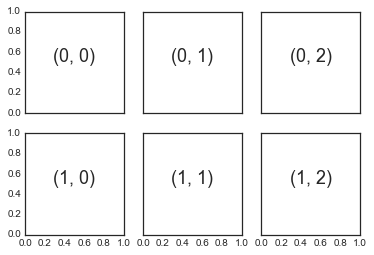

In [8]:
fig, axs = plt.subplots(2,3,sharex = 'col',sharey='row')
for i in range(2):
    for j in range(3):
        axs[i,j].text(0.5,0.5,str((i,j)),ha = 'center',fontsize = 18)

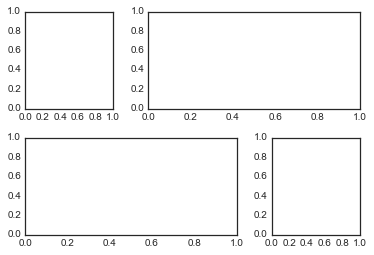

In [9]:
grid = plt.GridSpec(2,3, wspace = 0.4, hspace = 0.3)

plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

<class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'>


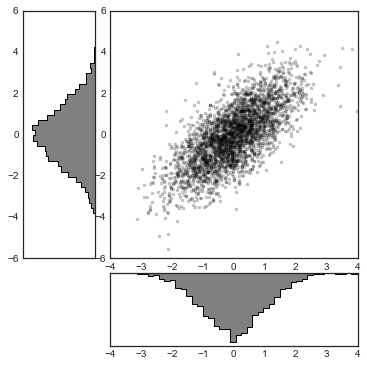

In [10]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace = 0.2,wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels = [],sharey = main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels = [],sharex = main_ax)

print(type(main_ax),type(y_hist),type(x_hist))
main_ax.plot(x,y,'ok',markersize = 3, alpha = 0.2)

x_hist.hist(x,40,histtype = 'stepfilled', orientation = 'vertical',color = 'gray')
x_hist.invert_yaxis()

y_hist.hist(y,40,histtype = 'stepfilled', orientation = 'horizontal',color = 'gray')
y_hist.invert_xaxis()

In [43]:
>>> mean = [0, 0]
>>> cov = [[1, 0], [0, 100]]  

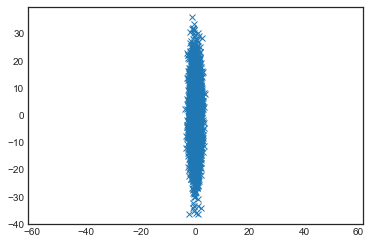

In [44]:
>>> import matplotlib.pyplot as plt
>>> x, y = np.random.multivariate_normal(mean, cov, 5000).T
>>> plt.plot(x, y, 'x')
>>> plt.axis('equal')
>>> plt.show()

## text annotation

In [34]:
plt.style.use('seaborn-whitegrid')




In [30]:
plt.style.use('classic')

In [6]:
births = pd.read_csv('statick/births.csv')

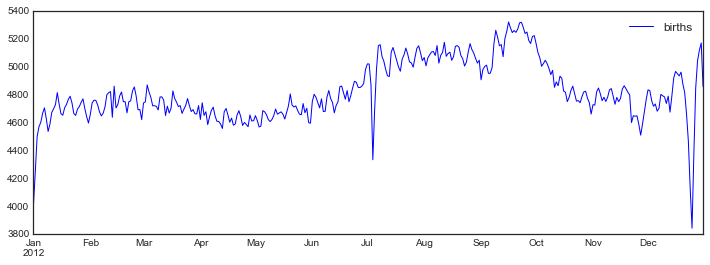

In [7]:
quartiles = np.percentile(births.births,[25,50,75])
mu,sig = quartiles[1],0.74 *(quartiles[2]-quartiles[0])
births = births.query ('(births>@mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births.index = pd.to_datetime(10000 * births.year + 100* births.month + births.day, format = '%Y%m%d')
birhts_by_date = births.pivot_table('births', [ births.index.month, births.index.day])
birhts_by_date.index = [pd.datetime(2012,month,day) for (month,day) in birhts_by_date.index]

fig, ax = plt.subplots(figsize = (12,4))
birhts_by_date.plot(ax=ax)

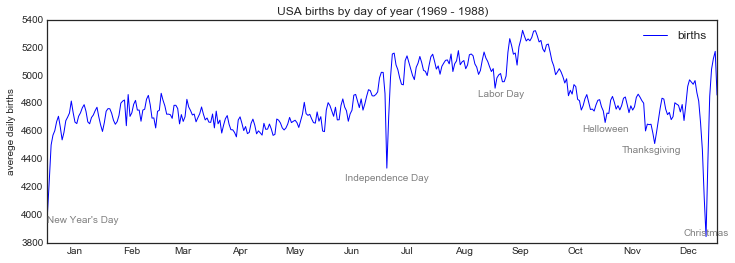

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
birhts_by_date.plot(ax = ax)
style = dict(size = 10,color = 'gray')

ax.text('2012-01-01', 3950, "New Year's Day", **style)
ax.text('2012-07-04', 4250, "Independence Day",ha= 'center', **style)
ax.text('2012-9-04', 4852, "Labor Day",ha= 'center', **style)
ax.text('2012-10-31', 4600, "Helloween",ha= 'center', **style)
ax.text('2012-11-25', 4450, "Thanksgiving",ha= 'center', **style)
ax.text('2012-12-25', 3850, "Christmas",ha= 'center', **style)

ax.set(title = "USA births by day of year (1969 - 1988)", ylabel = 'averege daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))


In [9]:
quartiles = np.percentile(births.births,[25,50,75])
mu,sig = quartiles[1],0.74 *(quartiles[2]-quartiles[0])
births = births.query ('(births>@mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.index = pd.to_datetime(10000 * births.year + 100* births.month + births.day, format = '%Y%m%d')
birhts_by_date = births.pivot_table('births', [ births.index.month, births.index.day])


In [10]:

quartiles = np.percentile(births.births,[25,50,75])
mu,sig = quartiles[1],0.74 *(quartiles[2]-quartiles[0])
births = births.query ('(births>@mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.index = pd.to_datetime(10000 * births.year + 100* births.month + births.day, format = '%Y%m%d')

birhts_by_date = births.pivot_table('births', [ births.index.month, births.index.day])
birhts_by_date.index = [pd.datetime(2012,month,day) for (month,day) in birhts_by_date.index]

In [11]:
births.year.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], dtype=int64)

In [12]:
cost_frm = pd.DataFrame(births.births,births.year)
cost_frm.describe()
# plt.hist(cost_frm,bins = births.year.unique())

ValueError: cannot reindex from a duplicate axis

## transforms and text position

Text(0.2,0.2,'. Figure: (0.2,0.2)')

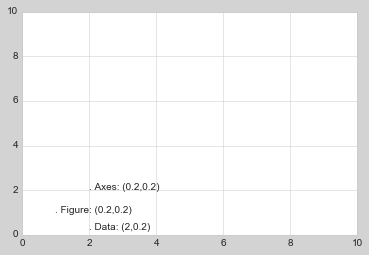

In [5]:
fig ,ax = plt.subplots(facecolor = 'lightgray')
ax.axis([0,10,0,10])
ax.text(2,0.2,'. Data: (2,0.2)',transform=ax.transData)
ax.text(0.2,0.2,'. Axes: (0.2,0.2)',transform=ax.transAxes)
ax.text(0.2,0.2,'. Figure: (0.2,0.2)',transform=fig.transFigure)

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')

ax.annotate('local maximum',xy = (6.28,1),xytext = (10,4),arrowprops = dict(facecolor='GRAY',shrink = 0.05))
ax.annotate('local minimum',
            xy = (5*np.pi,-1),
            xytext = (2,-6),
            arrowprops = dict(arrowstyle = '->',connectionstyle = 'angle3,angleA=0,angleB=-90'));

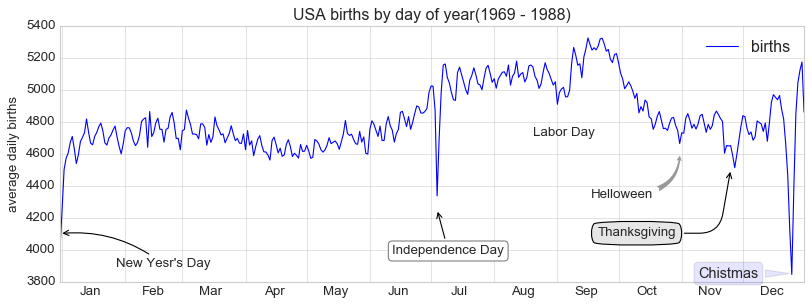

In [37]:
fig,ax = plt.subplots(figsize = (12,4))
birhts_by_date.plot(ax=ax)
ax.annotate("New Yesr's Day", xy=('2012-1-1',4100), xycoords='data',xytext=(50, -30), textcoords='offset points',
                                           arrowprops = dict(arrowstyle='->',connectionstyle='arc3,rad=0.2'))
ax.annotate('Independence Day',xy=('2012-7-4',4250),xycoords='data',
           bbox=dict(boxstyle='round',fc='white',ec='gray'),
            xytext=(10,-40),textcoords='offset points',ha='center',
            arrowprops=dict(arrowstyle='->'))

ax.annotate('Labor Day', xy=('2012-9-4',4850),xycoords = 'data',ha = 'center',xytext=(0,-20),textcoords='offset points')

# ax.annotate('',xy=('2012-9-1',4850),xytext=('2012-9-7',4850),xycoords='data',textcoords='data',
#            arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2',})

ax.annotate('Helloween',xy=('2012-10-31',4600),xycoords='data',xytext=(-80,-40),textcoords='offset points',
           arrowprops=dict(arrowstyle='fancy',fc='0.6',ec='none',connectionstyle='angle3,angleA=0,angleB=-90'))

ax.annotate('Thanksgiving',xy =('2012-11-25',4500),xycoords='data',xytext=(-120,-60),textcoords='offset points',
           bbox=dict(boxstyle='round4,pad=.5',fc='0.9'),
           arrowprops=dict(arrowstyle='->',connectionstyle='angle,angleA=0,angleB=80,rad=20'))

ax.annotate('Chistmas',xy=('2012-12-25',3850),xycoords='data',xytext=(-30,0),textcoords = 'offset points',size = 13,
           ha = 'right',va='center',bbox=dict(boxstyle='round',alpha=0.1,),
           arrowprops=dict(arrowstyle='wedge,tail_width=0.5',alpha=0.1))

ax.set(title='USA births by day of year(1969 - 1988)',ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

## customizing ticks

In [6]:

plt.style.use('seaborn-whitegrid')

[(10000000, 10.0), (10000000, 10.0)]

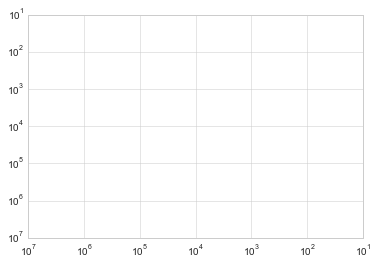

In [7]:
ax = plt.axes(xscale = 'log',yscale = 'log')
ax.set(xlim=10000000,ylim=10000000)

In [8]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [9]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

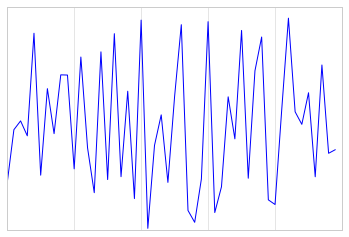

In [10]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

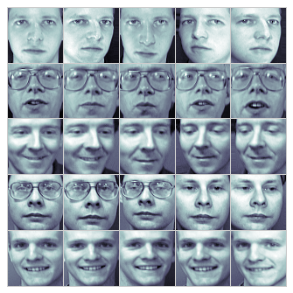

In [11]:
fig, ax = plt.subplots(5,5,figsize = (5,5))
fig.subplots_adjust(hspace = 0,wspace = 0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(faces[10*i+j],cmap='bone')

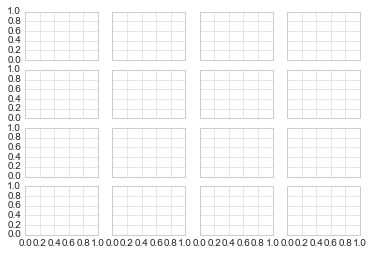

In [12]:
fig,ax = plt.subplots(4,4,sharex=True,sharey=True)

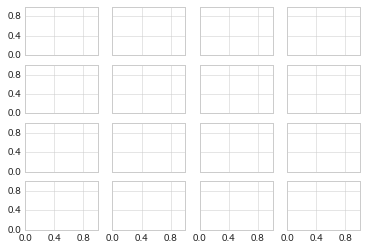

In [20]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

## fancy tick formats

(0, 9.42477796076938)

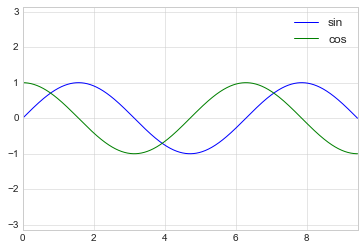

In [35]:
fig,ax = plt.subplots()
x = np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x),label = "sin")
ax.plot(x,np.cos(x),label = "cos")


ax.grid(True)
ax.axis('equal')
ax.legend(frameon=False)
ax.set_xlim(0,3*np.pi)

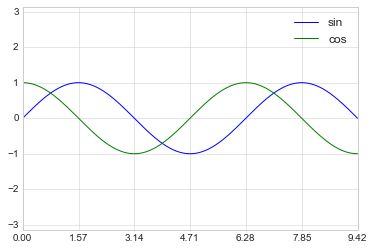

In [46]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig


In [58]:
def format_func (value, tick_number):
    N=int(np.round(2*value/np.pi))
    if N==0:
        return '0'
    elif N==1:
        return r'$\pi/2$'
    elif N==2:
        return r'$\pi$'
    elif N%2 > 0 :
        return r'${0}\pi/2$'.format(N)
    else:
        return r'${0}\pi$'.format(N//2)

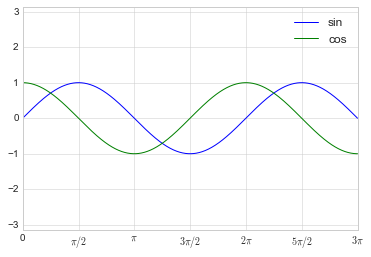

In [59]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

# Customizing Matplotlib: Configurations and Stylesheets


## plot custimization by hand

(array([  3.,   3.,  28.,  96., 192., 298., 223., 111.,  37.,   9.]),
 array([-4.00010343, -3.28873093, -2.57735842, -1.86598592, -1.15461341,
        -0.44324091,  0.2681316 ,  0.9795041 ,  1.69087661,  2.40224912,
         3.11362162]),
 <a list of 10 Patch objects>)

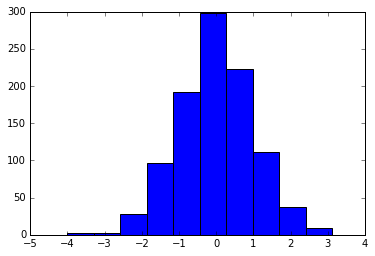

In [4]:
x = np.random.randn(1000)
plt.hist(x)

(array([  5.,  20.,  82., 172., 258., 249., 135.,  53.,  18.,   8.]),
 array([-3.23401768, -2.55939986, -1.88478203, -1.2101642 , -0.53554638,
         0.13907145,  0.81368927,  1.4883071 ,  2.16292492,  2.83754275,
         3.51216058]),
 <a list of 10 Patch objects>)

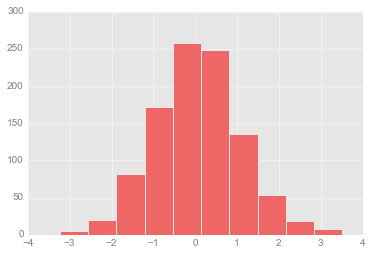

In [76]:
ax = plt.axes(facecolor  = '#e6e6e6')
ax.set_axisbelow(True)

plt.grid(color = 'w', linestyle = 'solid')

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(colors='gray',direction= 'out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
ax. hist(x,edgecolor='#e6e6e6',color='#ee6666')

In [77]:
IPython_default = plt.rcParams.copy()

In [79]:
from matplotlib import cycler
colors = cycler('color',['#ee6666','#3388BB','#9988DD','#EECC55','#88BB44','#ffbbbb'])
plt.rc('grid',color='w',linestyle = 'solid')
plt.rc('xtick',direction = 'out',color='gray')
plt.rc('ytick',direction='out',color='gray')
plt.rc('patch',edgecolor='#e6e6e6')
plt.rc('lines',linewidth=2)

(array([  5.,  20.,  82., 172., 258., 249., 135.,  53.,  18.,   8.]),
 array([-3.23401768, -2.55939986, -1.88478203, -1.2101642 , -0.53554638,
         0.13907145,  0.81368927,  1.4883071 ,  2.16292492,  2.83754275,
         3.51216058]),
 <a list of 10 Patch objects>)

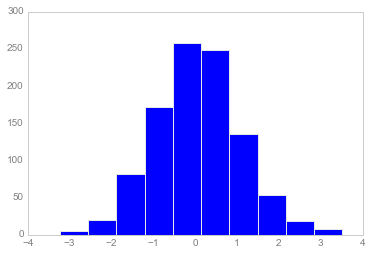

In [80]:
plt.hist(x)

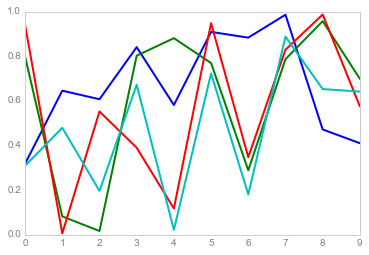

In [82]:
for i in range(4):
    plt.plot(np.random.rand(10))


## stylesheets

In [55]:
mpl.pyplot.rcdefaults()
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [ ]:
for i,style in enumerate(plt.style.available):
    
    fig,ax = plt.subplots()
    plt.style.use(style)
    ax.hist(np.random.randn(1000))
    ax.set(title = style)


In [49]:
def hist_and_lines():
    np.random.seed(0)
    fig,ax = plt.subplots(1,2,figsize = (11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a','b','c'],loc = 'lower left')

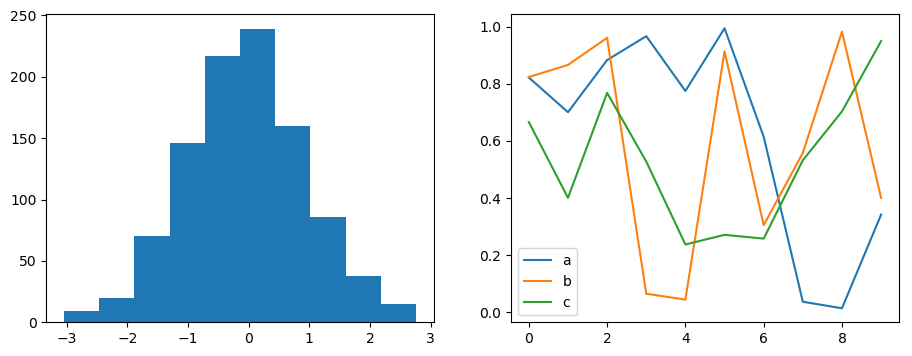

In [58]:
hist_and_lines()

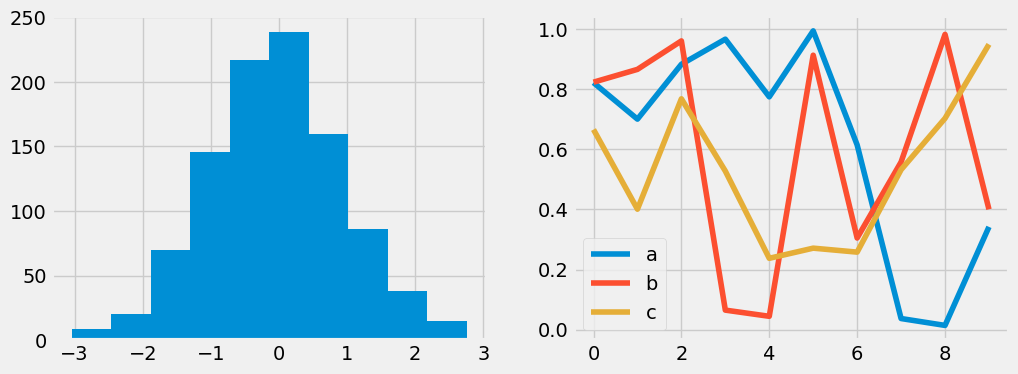

In [57]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

D:\Install\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


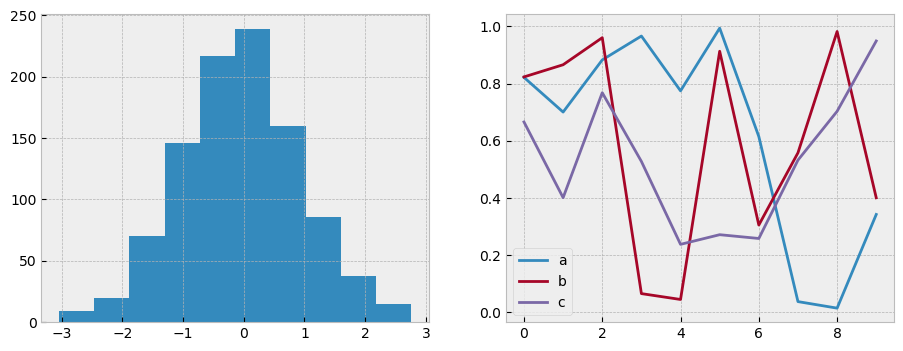

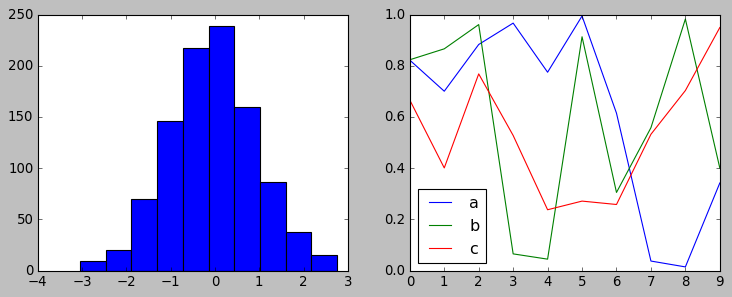

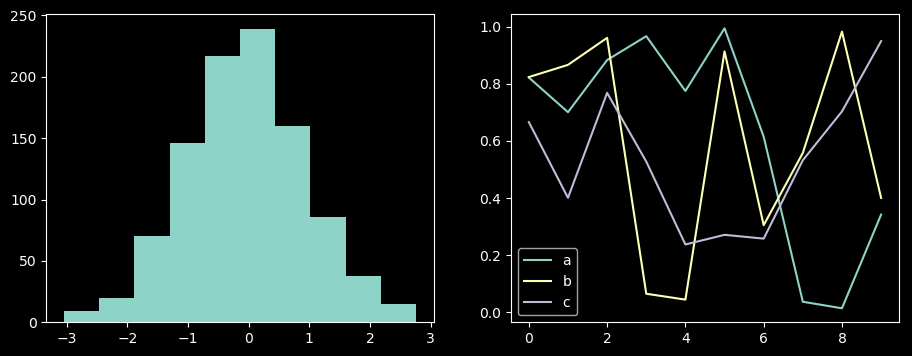

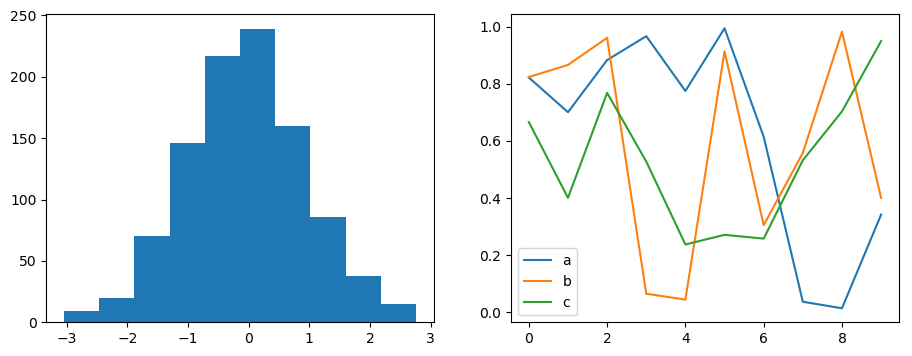

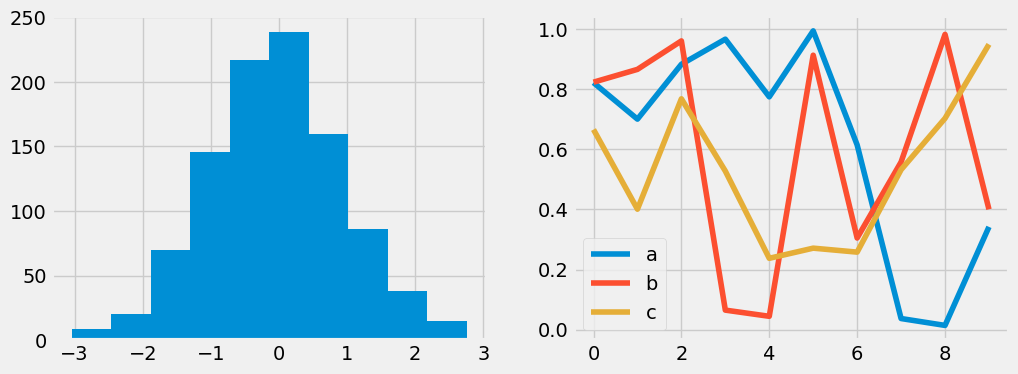

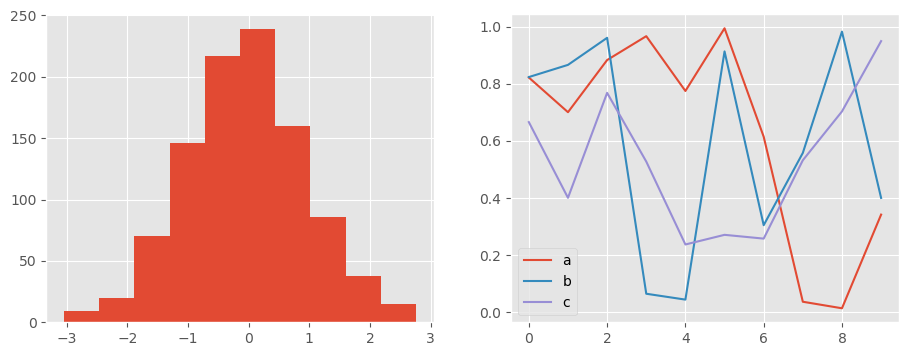

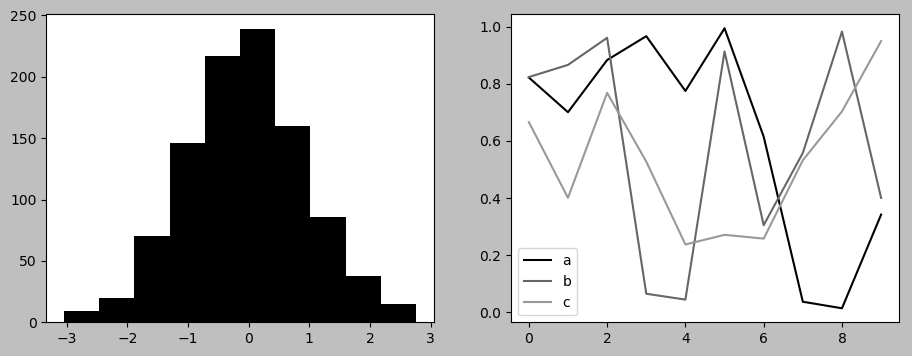

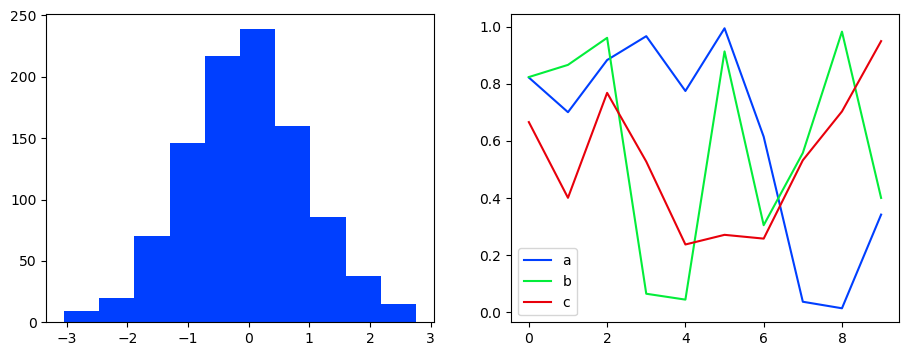

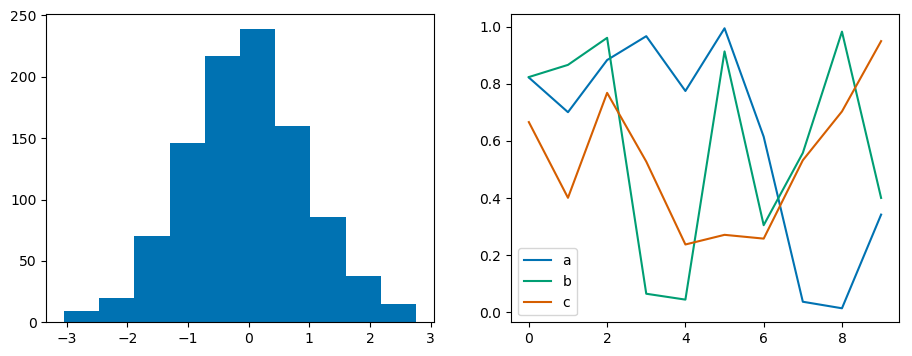

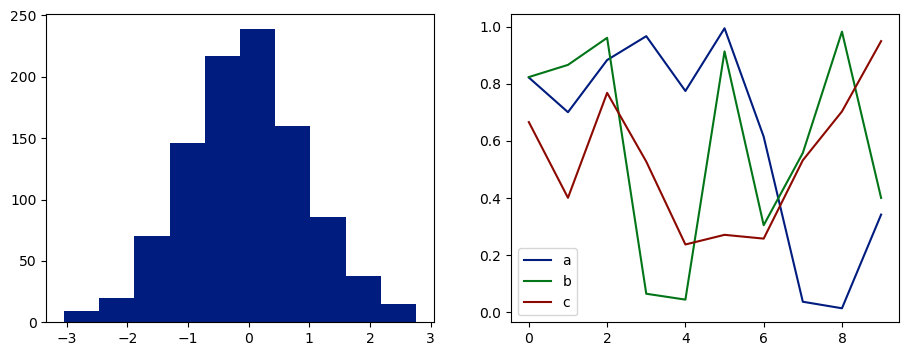

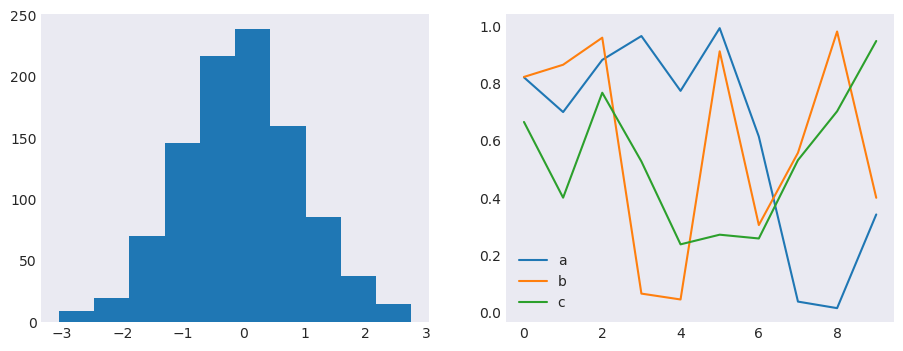

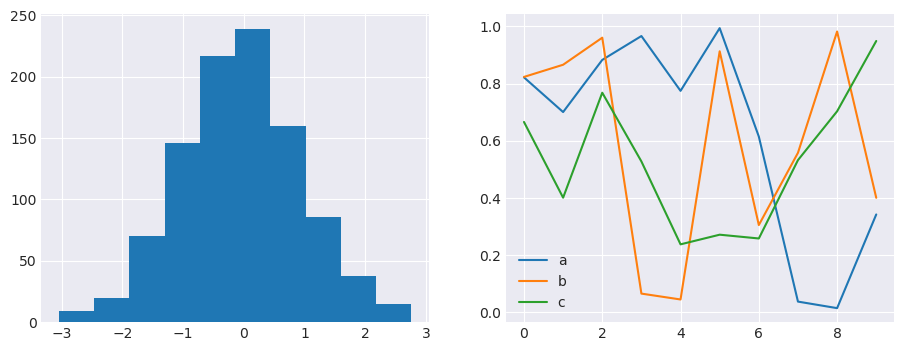

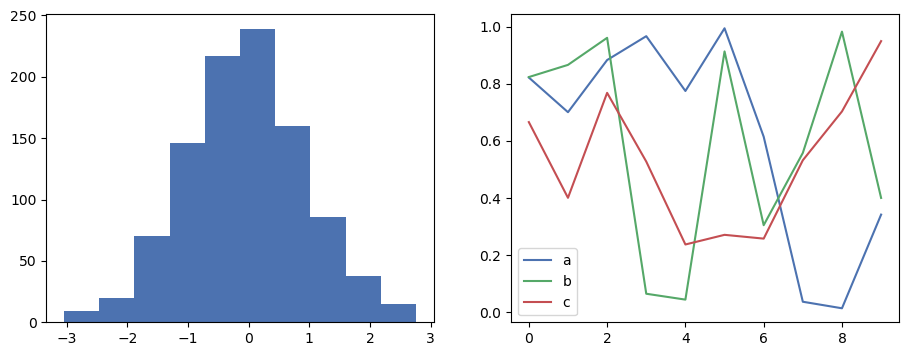

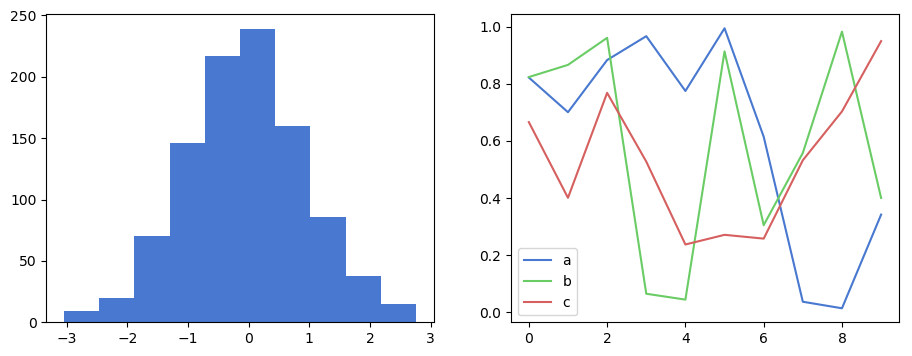

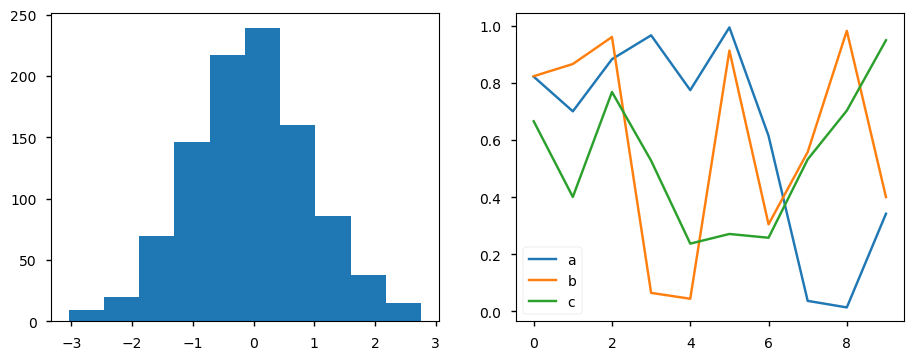

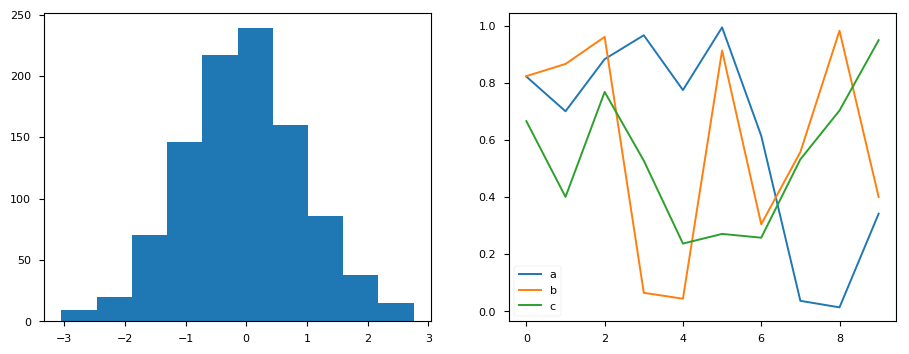

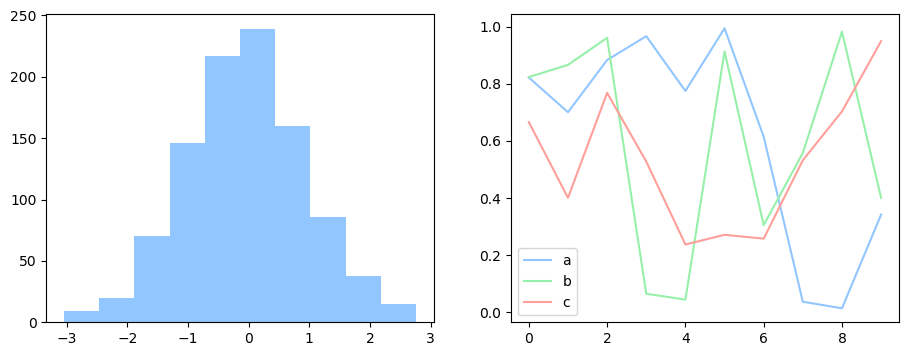

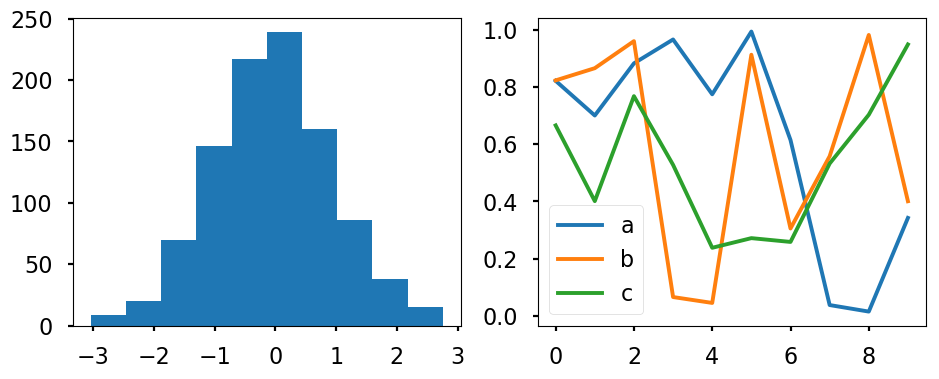

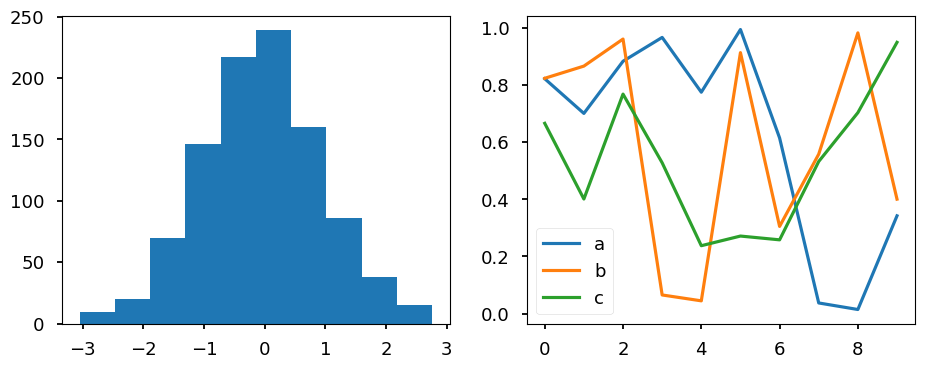

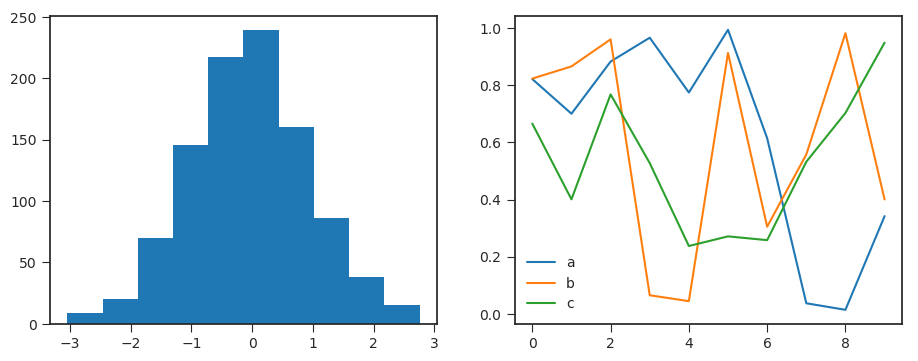

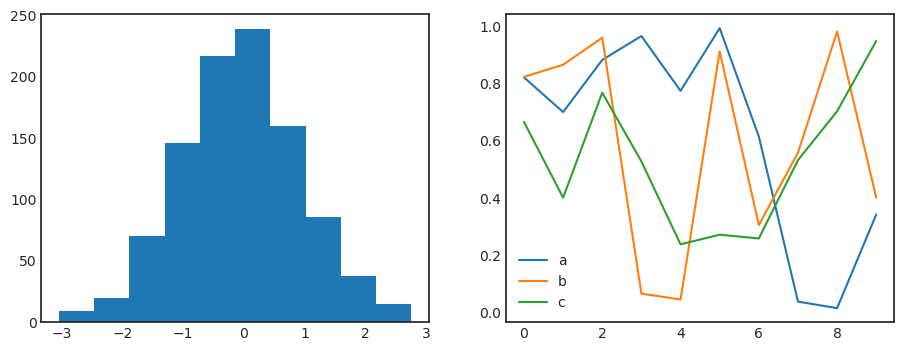

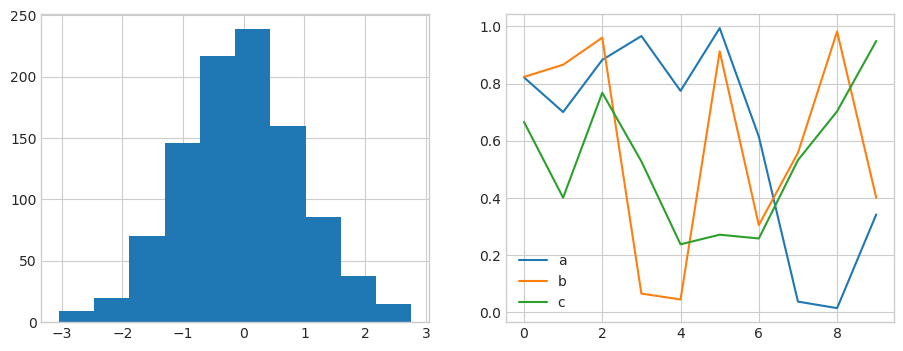

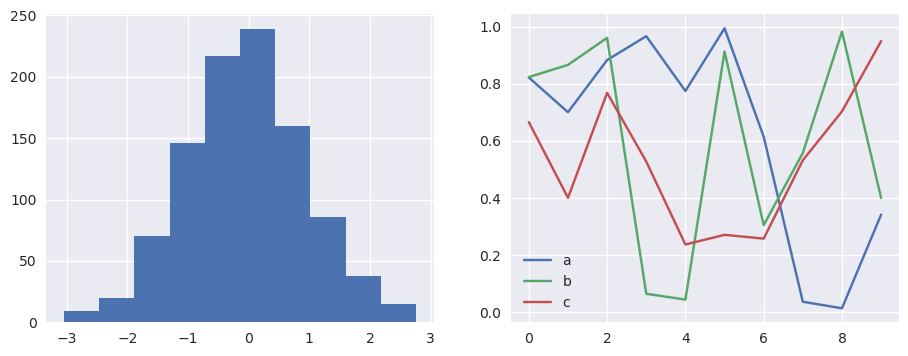

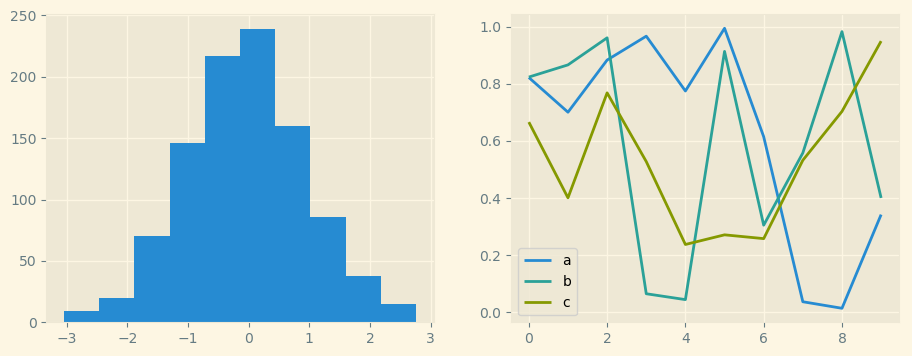

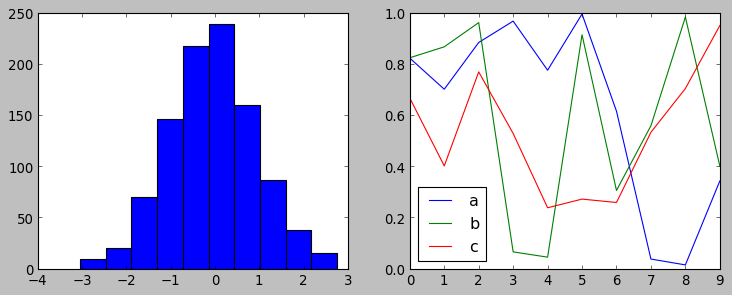

In [59]:
for i in plt.style.available:
    with plt.style.context(i):
        hist_and_lines()

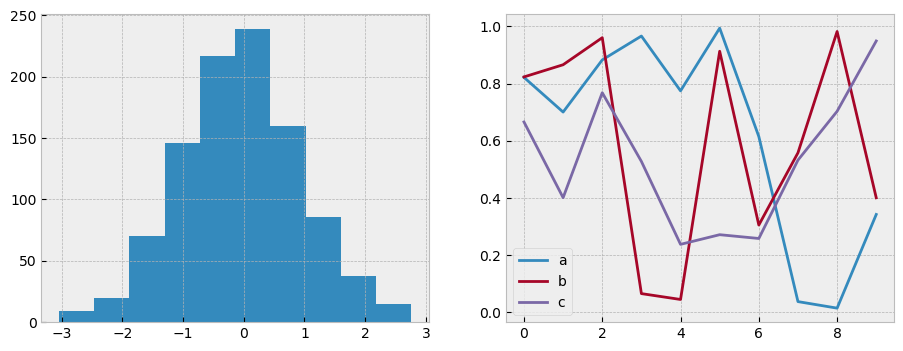

In [61]:
with plt.style.context('bmh'):
    hist_and_lines()

## three-dimensional plotting in matplotlib

In [5]:
from mpl_toolkits import mplot3d

In [6]:
%matplotlib qt

In [7]:
plt.style.use('seaborn')
fig = plt.figure()


In [41]:
del(ax,fig)

<IPython.core.display.Javascript object>


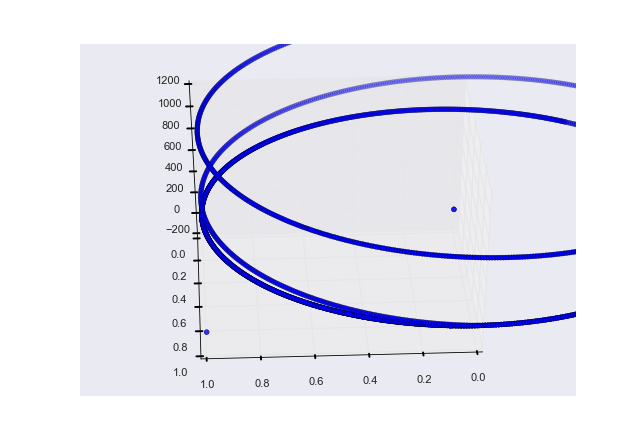

<IPython.core.display.Javascript object>


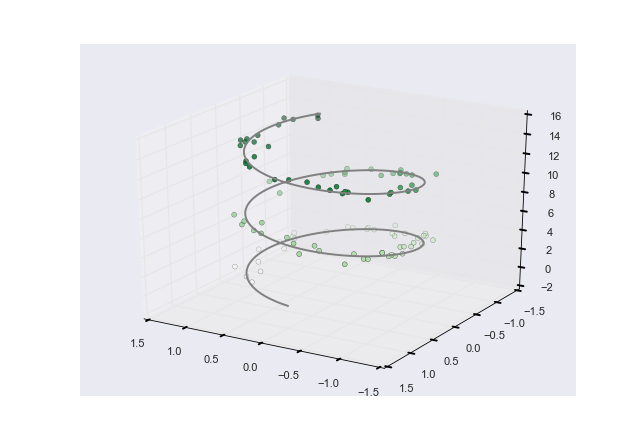

In [46]:
del(ax)
ax = plt.subplot(projection = '3d')
zline = np.linspace(0,15,1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline,yline,zline,'gray')

zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter(xdata,ydata,zdata,c=zdata,cmap = 'Greens')

In [6]:
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6,6,30)
y=x

X,Y = np.meshgrid(x,y)
Z =f (X,Y)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(X,Y,Z, 50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5,0,'z')

In [55]:
x_=y_=np.linspace(1,5,5)

In [56]:
print(x_,y_)

[1. 2. 3. 4. 5.] [1. 2. 3. 4. 5.]


In [58]:
pp(np.meshgrid(x_,y_))

[array([[1., 2., 3., 4., 5.],                              
       [1., 2., 3., 4., 5.],                               
       [1., 2., 3., 4., 5.],                               
       [1., 2., 3., 4., 5.],                               
       [1., 2., 3., 4., 5.]]), array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],                               
       [3., 3., 3., 3., 3.],                               
       [4., 4., 4., 4., 4.],                               
       [5., 5., 5., 5., 5.]])]                             


In [65]:
del(ax)

In [69]:
ax.view_init(60,35)

<IPython.core.display.Javascript object>


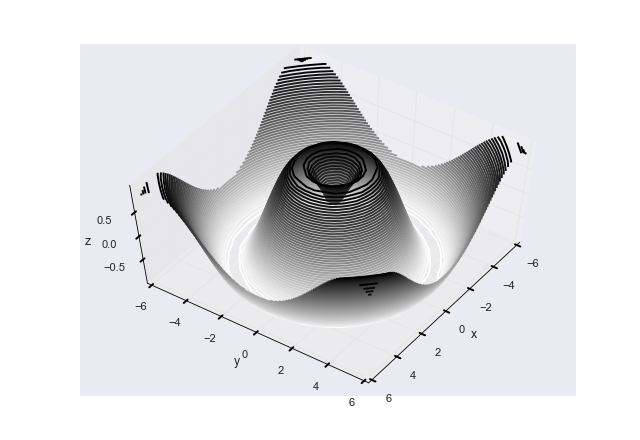

In [71]:
fig

<IPython.core.display.Javascript object>


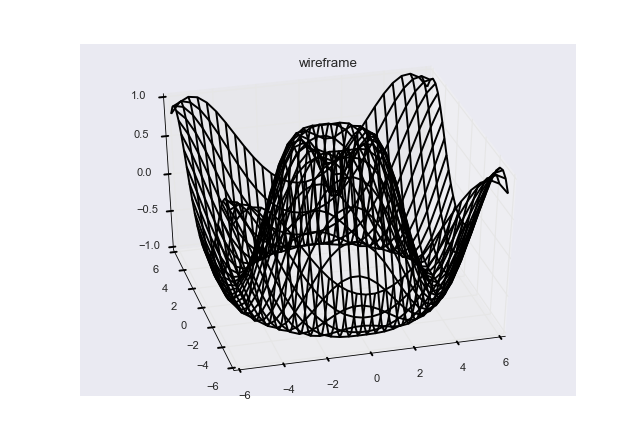

Text(0.5,0.92,'wireframe')

In [74]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X,Y,Z, color = 'black')
ax.set_title('wireframe')

<IPython.core.display.Javascript object>


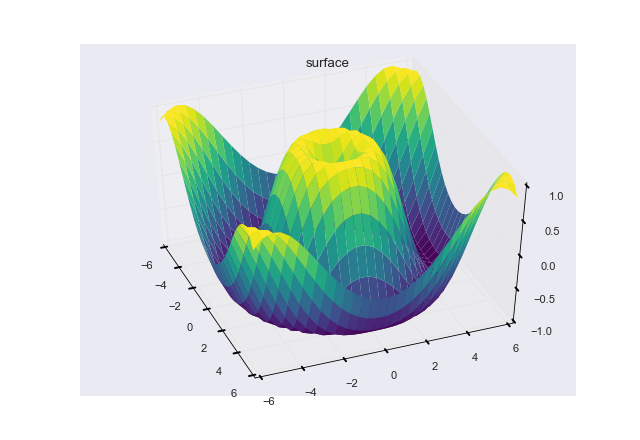

Text(0.5,0.92,'surface')

In [79]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z, rstride =1,cstride =1,
               cmap = 'viridis',edgecolor = 'none')
ax.set_title('surface')

<IPython.core.display.Javascript object>


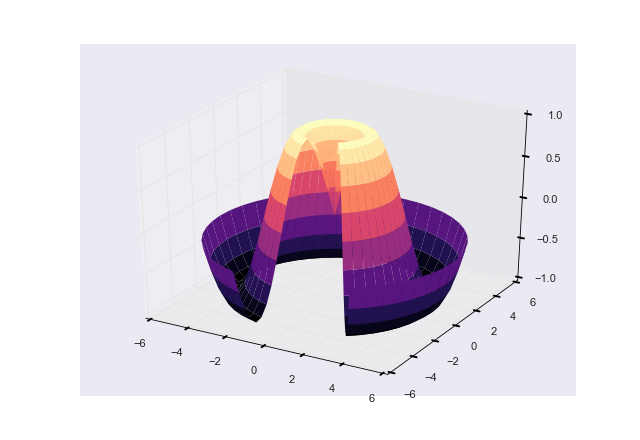

In [92]:
r = np.linspace(0,6,20)
theta =np.linspace(-0.9 * np.pi, 0.8 * np.pi,40)
r,theta = np.meshgrid(r,theta)
X=r*np.sin(theta)
Y=r*np.cos(theta)
Z=f(X,Y)
ax= plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride =1, cstride =1, cmap = 'magma',edgecolor = 'none' )

In [9]:
theta = 2*np.pi * np.random.random(1000)
r=6*np.random.random(1000)
x=np.ravel(r*np.sin(theta))
y=np.ravel(r*np.cos(theta))
z = f(x,y)

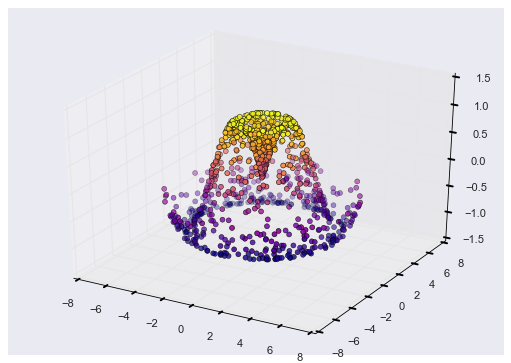

In [19]:
ax = plt.axes(projection='3d')
ax.scatter(x,y,z,c=z,cmap='plasma',linewidth = 0.5)
fig

In [20]:
ax=plt.axes(projection = '3d')
ax.plot_trisurf(x,y,z,cmap = 'plasma',edgecolor = 'none')

In [8]:
theta = np.linspace(0,2*np.pi,30)
w = np.linspace(-0.25,0.25,8)
w,theta = np.meshgrid(w,theta)

In [9]:
phi = 0.5*theta
r = 1+w*np.cos(phi)

x=np.ravel(r*np.cos(theta))
y=np.ravel(r*np.sin(theta))
z=np.ravel(w*np.sin(phi))

(-1, 1)

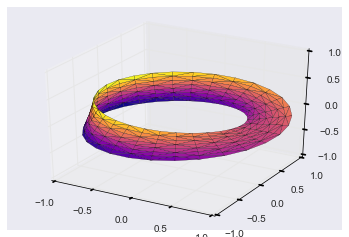

In [10]:
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w),np.ravel(theta))
ax = plt.axes(projection ='3d')
ax.plot_trisurf(x,y,z,triangles=tri.triangles,linewidths = 0.2,cmap = 'plasma')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [14]:
! export PROJ_LIB=/home/anaconda3/share/proj/

In [3]:
! echo $PROJ_LIB

/home/spi/anaconda3/share/proj


## Geographic data with basemap

In [4]:
from mpl_toolkits.basemap import Basemap

In [10]:
%matplotlib inline

/home/spi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


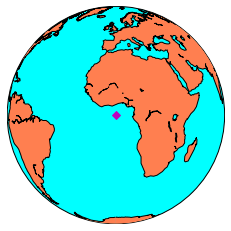

In [5]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua') 
map.fillcontinents(color='coral', lake_color='aqua') 
map.drawcoastlines()

x, y = map(0, 0)

map.plot(x, y, marker='D',color='m')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


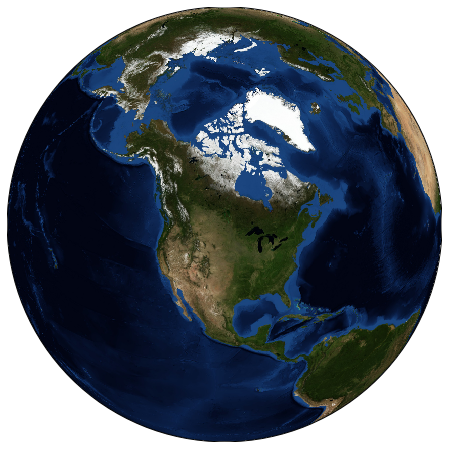

In [11]:
plt.figure(figsize=(8,8))
m=Basemap(projection='ortho',resolution=None,lat_0=50,lon_0=-100)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2347268.222744084, 4518079.266407729, 'Seattle')

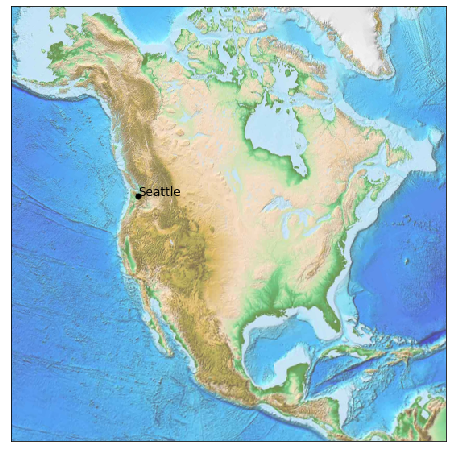

In [21]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc',resolution=None, width=8e6,height=8e6,lat_0=45,lon_0=-100)
m.etopo(scale=0.5,alpha=0.7)

x,y=m(-122.3,47.6)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,'Seattle',fontsize=12)

In [29]:
from itertools import chain
def draw_map(m,scale=0.2):
    m.shadedrelief(scale=scale)
    
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180,180,13))
    
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines,lon_lines)
    
    for line in all_lines:
        line.set(linestyle='-',alpha=0.3,color='w')

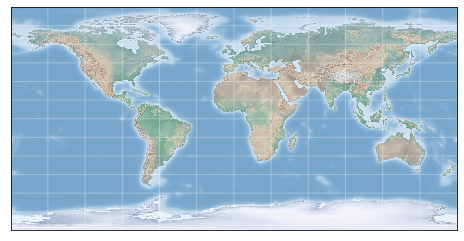

In [30]:
fig = plt.figure(figsize=(8,6),edgecolor = 'w')
m = Basemap(projection='cyl',resolution=None, llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
draw_map(m)